## Análisis de sentimientos de Twitter con Python
* https://platzi.com/tutoriales/1874-python-lenguaje-natural/5654-realiza-un-analisis-de-sentimiento-en-3-pasos-con-python/
    * Ejemplo https://twitter.com/whaleandjaguar_?lang=en
* https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
* https://www.justintodata.com/twitter-sentiment-analysis-python/
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

### 1) Descargar tweets

In [183]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
import pandas as pd
pd.set_option('display.max_colwidth',500)

In [215]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/twitter/main/tweets_df.json')

### 2) Análisis de sentimientos

In [186]:
from textblob import TextBlob

In [187]:
TextBlob('the day is bright').polarity

0.7000000000000001

In [188]:
TextBlob('the day is gray').polarity

0.0

In [189]:
TextBlob('the day is dark').polarity

-0.15

In [190]:
TextBlob('el día es oscuro').polarity

0.0

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en')

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en').polarity

### 2. Limitar los tweet a 500 palabras

In [103]:
data=df.sample(100).reset_index(drop=True)

In [104]:
data['tweet']=data['text'].str.split(':').str[-1]

In [105]:
len(data['tweet'].sum())

22631

In [106]:
data.loc[[10]]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,tweet
10,Oscar Carvajal,,,False,2021-05-12 03:26:44,"RT @intiasprilla: Desde #Cali en compañía de @wilsonariasc y @FabianDiazPlata les cuento que a la gente la quieren confundir, quieren llama…",[Cali],Twitter for Android,"Desde #Cali en compañía de @wilsonariasc y @FabianDiazPlata les cuento que a la gente la quieren confundir, quieren llama…"


In [112]:
polarity=[]
for tweet in data['tweet']:
    #print(tweet)
    #try:
    analysis=TextBlob(tweet)#.translate(from_lang='es',to='en')
    #except:
    #    analysis=TextBlob(tweet)
    polarity.append(analysis.polarity)

In [ ]:
TextBlob.

In [113]:
data['polarity']=polarity

In [114]:
data[['text','polarity']]

,text,polarity
0,"RT @ACVCRAN: #ParoNacional ""El campesinado del Valle del Río Cimitarra paran en contra del asesinato a líderes y lideresas defensoras de lo…",0.0
1,RT @elespectador: Los mensajes contradictorios del Gobierno frente al #ParoNacional. \nhttps://t.co/AfQc2fih3q https://t.co/SGd8NqzNTp,0.0
2,RT @CSPP_: #IMPORTANTE 🆘🗣️ Es importante que tengamos en cuenta que la defensa de los DDHH en Colombia en el marco del #ParoNacional 🇨🇴 pue…,0.0
3,"RT @dw_espanol: En la primera línea de las protestas en #Colombia\n\nEste ""instagramer"" y activista grabó de primera mano lo ocurrido durante…",0.0
4,RT @GiovanniCelisS: Ciudadanos de #Cali aplauden a @PoliciaColombia luego de levantamiento de bloqueos ilegales y disturbios en esa ciudad…,0.0
...,...,...
195,"RT @COMANDANTE_EJC: En #Cali, mi mensaje hacia ellos fue contarles que nuestro trabajo es por el bienestar, la estabilidad y seguridad de…",0.0
196,"RT @DanielPalam: En #Cali acompañamos al Pdte @IvanDuque en diálogo con diferentes instituciones y sectores del #ValleDelCauca, quienes se…",0.0
197,"RT @KevinMaOficial: Hace unos momentos en Siloé, Cali. Protesta pacífica, sostenida, pero sobre todo en paz. #ParoNacional11M #ParoNacion…",0.0
198,Art. 374 de la Constitución Política de Colombia! Es lo que hay q exigir #ParoNacionalColombia #ParoNacional12M #momentosdecambios #colombia #Cali #referendoya #nomascorruptos @CongresoCol @infopresidencia https://t.co/t9KIqrIcT5,0.0


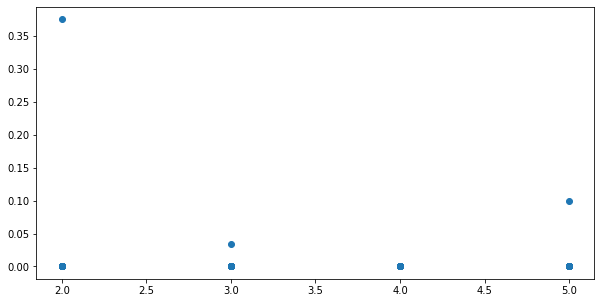

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(data['date'].apply(lambda d: d.hour),data['polarity'])

### Cree un nuevo clasificador
https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

In [192]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/restrepo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

See:
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

In [193]:
import re
stop_words=['rt',':']#+stopwords.words('spanish')
def preprocess_tweet_text(tweet):
    tweet=tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, re.UNICODE ,flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    #tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = tweet.replace("  "," ").split()
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [197]:
df['text'].apply(preprocess_tweet_text)

AttributeError: 'Series' object has no attribute 'lower'

In [159]:
preprocess_tweet_text( .loc[0] 

'el semanario voz recalca su apoyo a la minga indígena. nos cuida el movimiento popular, no las fuerzas militares. ✊ par…'

A favor → pos
En contra → neg

In [202]:
from fuzzywuzzy import process
from fuzzywuzzy import  fuzz

In [206]:
process.extractOne('hola',['mundo'],scorer=fuzz.ratio)[-1]

22

In [214]:
df[:1]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,label
0,Aníbal Cano,,Optimista alegre de esta maravillosa vida que Dios Todopoderoso nos entregó . . .,False,2021-05-18 20:35:32,"RT @UnivalleU: #Movilización ✊ Gran Marcha del Millón ¡#Cali Despertó!\n\nMovilización familiar, artística y cultural de un millón de persona…","[Movilización, Cali]",Twitter for Android,None


In [255]:
df['label']=None
ii=0
similarity=[]
for i in df.index:
    print("="*80)
    tweet=df.loc[i,'text']
    if similarity:
        if process.extractOne(tweet,similarity,scorer=fuzz.ratio)[-1]<90:
            similarity.append(tweet)
            posneg=input(f"{tweet}: https://twitter.com/twitter/status/{df.loc[i,'id']} → [pos]/neg")
            if posneg=='n':
                posneg='neg'
            elif posneg=='p':
                posneg='pos'
            else:
                continue
            df.loc[i,'label']=posneg
            ii=ii+1
    else:
        similarity.append(tweet)

    if ii==150:
        break

RT @PoloDemocratico: El #ParoNacional es la manifestación del pueblo por la inconformidad qué hay con el gobierno de @IvanDuque, queremos q…: https://twitter.com/twitter/status/1394753529844219907 → [pos]/neg p


RT @PrensaRural: #ParoNacional, Campesinado del Catatumbo:

En alerta máxima ante orden de Duque de tierra arrasada

👉https://t.co/31jO1zLD…: https://twitter.com/twitter/status/1394753517546508288 → [pos]/neg 


RT @Tiradorsilencio: Como Ciudadano Colombiano me solidarizo y Apoyo d manera Absoluta y Total; la Carta d Ciudadanos d #Cali pidiendo d fo…: https://twitter.com/twitter/status/1394753499943079939 → [pos]/neg 


RT @alertaroja234: @BluRadioCo Para aquellos que llaman a la guerra y al uso desproporcionado de la fuerza. Aquellos que bloquean son en la…: https://twitter.com/twitter/status/1394753497912942594 → [pos]/neg 


RT @madeleintlSUR: Un día de #ParoNacional #Medellin #Colombia de lee desde el aire anti #uribista https://t.co/cmX982EmFR: https://twitter.com/twitter/status/1394753451314253828 → [pos]/neg 


Miércoles 19 de mayo Te esperamos 
A PARAR PARA AVANZAR 
#ParoNacional #Buga 🇱🇹 https://t.co/1twBnGpA0P: https://twitter.com/twitter/status/1394753400051490816 → [pos]/neg 


RT @ClaraLopezObre: Presidente @IvanDuque se equivoca. @petrogustavo no es solo uno de 108 senadores. Representa 8 millones ciudadanos y es…: https://twitter.com/twitter/status/1394753376714362883 → [pos]/neg 


RT @Nessnio: Me ausento un poco guerreros, pero les pido el favor de no olvidar, que mañana debemos marchar como un ejército multitudinario…: https://twitter.com/twitter/status/1394753338244091904 → [pos]/neg 


@Emile1985 @elespectador No pues los 
much4chosdrogos y d3lincu3nt3s es lo que hay en ese #ParoNacional: https://twitter.com/twitter/status/1394753334536458242 → [pos]/neg 


RT @aciprensa: El delegado especial del @episcopadocol, Mons. Héctor Henao, pidió que se excluya todo gesto de violencia en Colombia, de ta…: https://twitter.com/twitter/status/1394753319281778688 → [pos]/neg 


RT @PoloDemocratico: El Senador y presidente del @PoloDemocratico @AlexLopezMaya denuncia la infiltración de la fuerza pública entre los ma…: https://twitter.com/twitter/status/1394753316693946371 → [pos]/neg 


RT @RedactoresNewsw: #redactoresinforma Por la Impunidad y la Injusticia, las Madres Colombianas 💞 siguen uniendo su voz de lucha en el #Pa…: https://twitter.com/twitter/status/1394753259156475904 → [pos]/neg 


@RevistaSemana @VickyDavilaH Ni el asesinato de #JesusSantrich pudo ser tan fuerte, para opacar el #ParoNacional .

En este Gobierno ya no sirven ni los agendamientos mediáticos, ni los espirales de silencio.

#ColombiaSOS: https://twitter.com/twitter/status/1394753204328583171 → [pos]/neg 


RT @WilsonP725: Pasando el tema de Petro y Nany Pardo, les recuerdo que estamos en Paro y que mañana las movilizaciones deben ser masivas.…: https://twitter.com/twitter/status/1394753123147816960 → [pos]/neg 


Despilfarro, contratitis que en algún momento @Revista2caras denunció de la concejal. Recuerda que por eso apoyaba la alcaldía de @MauriceArmitage ? Es claro que @JorgeIvanOspina no le ha ayudado en nada y por eso insiste en atacar justo en esta coyuntura #Cali https://t.co/FJRwJcQa35: https://twitter.com/twitter/status/1394753104021577733 → [pos]/neg 


RT @cutcolombia: 🚶‍♂️🚶🚶‍♀️#ParoNacional 

El gobierno de Duque no quiere negociar, se niega a brindar garantías. Le responderemos masivamen…: https://twitter.com/twitter/status/1394753011281506309 → [pos]/neg 


RT @JorgeOvalleB: ¿Porque el estallido social en #CALI? lejos de la idea miope de la infiltración insurgente del #ParoNacional que plantea…: https://twitter.com/twitter/status/1394753003903651841 → [pos]/neg 


RT @NadieNa71747061: Así se resiste en Cali!!! 
Miren ese vandalismo!!!

#ParoNacional #Cali #CaliResiste #MissUniverse2021 #ElParoSigue #S…: https://twitter.com/twitter/status/1394752977970376713 → [pos]/neg 


RT @MiluBites: Acabo de leer que @MayaAlcaldePei llegó tarde ayer a la Comisión de Paz del Senado porque su perrito estaba cumpliendo años…: https://twitter.com/twitter/status/1394752972199022596 → [pos]/neg 


El #ParoNacional me ha servido para ver la calidad de seres humanos que me rodean y para sacar del llavero a unos cuantos “ciudadanos de bien”: https://twitter.com/twitter/status/1394752957602844673 → [pos]/neg 


VIDEO COMPLETO CAPTURA EN FLAGRANCIA POLICIA JUDICIAL 🇨🇴

#Cali
#Colombia
#DelincuenciaCali
#ladronescali
#gaminescali
#ParoNacional
#ONUHumanRights
@amnistiaespana
@hrw_espanol
@amnistia
@ONUHumanRights
@elmundoes
@nbc https://t.co/J1SJUrO5N9: https://twitter.com/twitter/status/1394752956944326659 → [pos]/neg 


RT @WRadioColombia: #Cali Renunció el comandante de la Policía de Cali → https://t.co/XrVUmSTVj8 https://t.co/o7hzhfTYKm: https://twitter.com/twitter/status/1394752894893690881 → [pos]/neg 


RT @JorgeOvalleB: El índice GINI que mide la distribución de ingresos, muestra que en #CALI la desigualdad creció a nivel de 2012 al ubicar…: https://twitter.com/twitter/status/1394752892716859392 → [pos]/neg 


RT @NoticiasCartag: #Cartago La situación es crítica en un sector de la comuna uno a esta hora, decenas de personas afectadas por los gases…: https://twitter.com/twitter/status/1394752854791970825 → [pos]/neg 


RT @JorgeOvalleB: La ñapa, en Colombia estamos en una dictadura y las dictaduras se derrotan con la democracia directa, con el derecho cons…: https://twitter.com/twitter/status/1394752765025558536 → [pos]/neg 


RT @Cambiamoscol: Nuestras únicas armas son la educación y las ganas de cambiar este país. 🔥✊🏽
#ParoNacional #ParoNacional18M #SOSColombiaD…: https://twitter.com/twitter/status/1394752757710659585 → [pos]/neg 


RT @cutcolombia: 🚶‍♂️🚶🚶‍♀️#ParoNacional 

El Paro continúa. Por la Vida y la Paz. Ante un gobierno que no quiere negociar y se niega a brin…: https://twitter.com/twitter/status/1394752746801278976 → [pos]/neg 


RT @JorgeOvalleB: Resultado: la más grande movilización ciudadana en #CALI contra el uribismo e @IvanDuque, según el CNC en total 1.983.053…: https://twitter.com/twitter/status/1394752735946448896 → [pos]/neg 


RT @JorgeOvalleB: Según el @DANE_Colombia para el  trimestre diciembre - febrero de 2021 los y las jóvenes en #CALI que ni estudian ni trab…: https://twitter.com/twitter/status/1394752688294879236 → [pos]/neg 


RT @JorgeOvalleB: En 2020 los ingresos de los hombres jóvenes en Cali se redujo -16,8% respecto al 2019, el ingreso laboral promedio fue de…: https://twitter.com/twitter/status/1394752632196116480 → [pos]/neg 


¿Porqué las #negociaciones se hacen a puerta cerrada?
Deberían ser transmitidas, en vivito y directo. Así como tenemos que ver las babosadas que habla este tipo @IvanDuque. 

#Colombia 
#ParoNacional: https://twitter.com/twitter/status/1394752621639053313 → [pos]/neg 


@clarincom Estos son los del entierro del Diego?
O más de la mentira diaria del #GobiernoDeInutiles 

#Covidiano🐑😷💉Evita las aglomeraciones, #VirusChino sabe cuándo sales a protestar y NO ATACA
Aún crees que #FalsaPandemia se trata de Salud Pública?😂🤣
#Argentina #Colombia #ParoNacional https://t.co/6jAXYRVEQ4: https://twitter.com/twitter/status/1394752616765198338 → [pos]/neg n


Acabo de leer que @MayaAlcaldePei llegó tarde ayer a la Comisión de Paz del Senado porque su perrito estaba cumpliendo años y le tenían que partir la torta primero a él antes de reunirse con las víctimas de la fuerza pública en el #paronacional ¿Será eso posible? #prioridades https://t.co/D1NPKKGoWn: https://twitter.com/twitter/status/1394752615670484996 → [pos]/neg 


RT @JorgeOvalleB: #DesempleoJuvenil Para el 2020 el desempleo juvenil en #CALI fue de 29,1% con 112.929 jóvenes desempleados/as, con 26 mil…: https://twitter.com/twitter/status/1394752578718773256 → [pos]/neg p


RT @MafeCarrascal: En Antioquia, Caldas, la de anoche fue una noche de horror. Disparos en medio de la oscuridad y sin señal de internet. ¿…: https://twitter.com/twitter/status/1394752552261066762 → [pos]/neg 


@ELTIEMPO Escucha estos sinvergüenzas, bloquean extorsionan cobrando peajes ilegales y cuando el ESMAD los rodea para impedir su avanze criminal, lloran como nenas, mirelos como dan quejas 😂😂 😂 😂 perdedores. #NoMasParo #NoMasBloqueos #NoMasBloqueos #NoMasBloqueos #NoMasBloqueos: https://twitter.com/twitter/status/1394752532430434307 → [pos]/neg n


[IRI·Prensa·13/05/21] Diálogo sincero y constructivo ante crisis nacional. https://t.co/KvAqsgwfsS #ParoNacional #Colombia @CIDH @infopresidencia @MinInterior @faiths4forests @brasiliri  @gaiaamazonas @InstitutoSINCHI @cutcolombia: https://twitter.com/twitter/status/1394752501631660036 → [pos]/neg p


RT @boyacasietedias: El #Sondeo7días de hoy: Cuando ya se cumplen 21 días de #ParoNacional, a propósito de la medida anunciada por el Presi…: https://twitter.com/twitter/status/1394752478768508932 → [pos]/neg 


RT @JorgeOvalleB: En #CALI para el año 2020 el 20% de hogares con menores ingresos registraron una reducción del 50,1% de sus ingresos real…: https://twitter.com/twitter/status/1394752447072067591 → [pos]/neg 


RT @teleSURtv: Continúa el #ParoNacional en #Colombia🇨🇴, cientos de manifestantes se han congregado en las calles de #Bogotá en rechazo de…: https://twitter.com/twitter/status/1394752443636977664 → [pos]/neg 


RT @JorgeOvalleB: #ClasesSociales La clase pobre y vulnerable en #CALI fue del 62,5% de la población para 2020 y registró crecimiento de 10…: https://twitter.com/twitter/status/1394752392726450182 → [pos]/neg 


RT @teleSURtv: El alcalde de Cali, #Colombia🇨🇴, #JorgeIvánOspina, pidió la renuncia a todos los miembros de su gabinete en medio de las pro…: https://twitter.com/twitter/status/1394752345192468484 → [pos]/neg 


RT @anabanana0nana: La verdadera razón de la #ReformaALaSalud y de porque nos están matando.  Es que esos milloncitos de don Satanás Sarmie…: https://twitter.com/twitter/status/1394752286778400771 → [pos]/neg 


RT @NotiBAdentro: #ParoNacional #18M

El sector de los trabajadores de los cárnicos, se suma al gran paro nacional. https://t.co/YcHce1Oqdt: https://twitter.com/twitter/status/1394752277253083139 → [pos]/neg 


RT @mariomojc: @petrogustavo “Es que Colombia ya es como Venezuela" 😎

Esa visita de ayer acá en Barranquilla estuvo buena 😁

#ParoNacional…: https://twitter.com/twitter/status/1394752269959184388 → [pos]/neg 


RT @Iamthespeaker_: Atención Cali ¡La convocatoria de speakers del evento TEDxCali ‘Cali: Caminos de diálogo’ 2021 ya está abierta!. Este t…: https://twitter.com/twitter/status/1394752191991255046 → [pos]/neg 


@BluRadioCo Por supuesto  que sí, más cuando quienes bloquean, saquean y violan derechos de las grandes mayorías de Colombia #NoMasParo #NoMasBloqueos #ElParoNoMeRepresenta #AtrabajarMamertos: https://twitter.com/twitter/status/1394752145082159112 → [pos]/neg n


RT @teleSURtv: Los primeros grupos de la #MingaIndígena llegaron este martes a la ciudad de #Medellín, #Colombia🇨🇴, para apoyar el #ParoNac…: https://twitter.com/twitter/status/1394752112328941571 → [pos]/neg p


La élite que ha gobernado durante décadas jamás se ocupó de manera decisiva por la Seguridad Alimentaria. Pero tras 20 días de #ParoNacional ahí se les volvió (en apariencia) su mayor prioridad ¿No será que su preocupación es por los negocios de distribución de alimentos?: https://twitter.com/twitter/status/1394752010197536768 → [pos]/neg 


RT @viktorclop: @ClaudiaLopez La que parece haciendo campaña es ud Claudia, si hablamos de oportunismo porque no menciona a su partido que…: https://twitter.com/twitter/status/1394751963674419204 → [pos]/neg 


Mañana 19 de mayo #ParoNacional #Valledupar #Colombia https://t.co/OaB4pD52am: https://twitter.com/twitter/status/1394751959656280064 → [pos]/neg 


@IvanDuque Deberia estar regulando a los influences del pais que ganan bastante platica en un mes de 80 a 200 millones ..y no estar detras de la gente que exige mejoras economicas. Busque la plata donde es, no en gente del comun. #ParoNacional17M #ParoNacional: https://twitter.com/twitter/status/1394751913112084485 → [pos]/neg 


@ingrodolfohdez #ParoNacional #ColombiaResiste  ..el congreso de este país no va a dejar de ser la misma HORDA de BUITRES de siempre: propongo #NoEleccionesEnColombia2022..  el sistema será el mismo sin importar que presidente suba: propongo #NuevaConstitución de los Pobres y para los POBRES..: https://twitter.com/twitter/status/1394751890366377986 → [pos]/neg 


RT @AisoMovimiento: Mañana 19 de mayo nos movilizamos en la GRAN MARCHA DEL MILLÓN, porque solo el pueblo salva el pueblo 
#19M #ParoNacion…: https://twitter.com/twitter/status/1394751888181108740 → [pos]/neg 


RT @teleSURtv: #Colombia 🇨🇴 | Ciudadanos denunciaron este martes que el #Esmad de la Policía reprimió la noche del lunes a las personas que…: https://twitter.com/twitter/status/1394751887992307713 → [pos]/neg 


RT @JorgeOvalleB: #LuchaDeClases Durante el 2020 la clase pobre y  vulnerable en #CALI aumento con 295.540 personas, para un total de 1.6 m…: https://twitter.com/twitter/status/1394751816412405765 → [pos]/neg 


RT @Caprietto: Algunos se molestan, pero hay que decirll:

— El pueblo no salió a la calle
— Bloqueas una calle, sos un delincuente
— Los d…: https://twitter.com/twitter/status/1394751796913090561 → [pos]/neg n


RT @ElDeLosTapaboca: Buenos días! 

Mi admiración, mi respeto y mis oraciones para los jóvenes que siguen dejando sus ojos y sus vidas en l…: https://twitter.com/twitter/status/1394751654721904642 → [pos]/neg p


RT @FdoQuijano: #ParoNacional 🇨🇴😁 #NosRecuerda @HELIODOPTERO "El paro nacional despierta emoción y simpatía en Miss Universo." https://t.co…: https://twitter.com/twitter/status/1394751617845637120 → [pos]/neg 


RT @NSimpsombia: Como realmente abatieron a Jesús Santrich
- Sr Thompson 

#JesusSantrich #Santrich #Farc #Colombia #paronacional https://t…: https://twitter.com/twitter/status/1394751593522868230 → [pos]/neg 


RT @alejzuluaga: .@juanpisrules, @AlejandroRia, hicimos una breve adaptación de su maravilloso video. Escena protagonizada por el alcalde d…: https://twitter.com/twitter/status/1394751585582977025 → [pos]/neg 


RT @PBIcanada: Este es un vehículo de fabricación canadiense que fue vendido a la policía nacional de Colombia. Estamos monitoreando las pu…: https://twitter.com/twitter/status/1394751572157116423 → [pos]/neg 


Inicia tu carrera con nosotros, sé parte de nuestras capacitaciones y déjate asesorar y guiar por nuestros expertos. 

Abrimos nuevos #cupos Escríbenos 322 8864081

#cali #colombia #trabajoencali #trabajocali #modelaje #aumentatusingresos #martes #empleo #empleoencali #elempleo https://t.co/eXKrz5Lv2z: https://twitter.com/twitter/status/1394751568608649218 → [pos]/neg 


RT @Contagioradio1: #Yumbo hace dos horas en la Estación de Policía La Mega, varios de los detenidos desde ayer fueron gaseados en medio de…: https://twitter.com/twitter/status/1394751517400387592 → [pos]/neg 


RT @UnivalleU: El Barón Rojo Sur se suma a la gran marcha del millón de personas en #Cali somos todo un pueblo.

https://t.co/mdQlQ7pe9k: https://twitter.com/twitter/status/1394751448676712457 → [pos]/neg 


RT @ChalecosAmarill: 🎥🛑En #Colombia así quedó registrado el bombardeo por #Venom a los manifestantes pacíficos en #Yumbo hace apenas 3 hora…: https://twitter.com/twitter/status/1394751446017626112 → [pos]/neg 


RT @wdelbar: Las #MadresContraLaImpunidad se mantienen en las calles. ¡Vamos con todas, con todos, vamos con ellas! #ParoNacional #ParoNaci…: https://twitter.com/twitter/status/1394751416565108737 → [pos]/neg 


RT @sermeca: 📌 Mineros, barequeros, cocaleros y comunidad indígena bloquean a esta hora la glorieta de entrada al municipio de Caucasia. Se…: https://twitter.com/twitter/status/1394751392477294607 → [pos]/neg 


RT @TodosporCali_: 👉 Ella lo esperaba en casa, pero Sebastián nunca regresó.🐕😔

El homenaje que le hicieron amigos y vecinos a Sebastián Qu…: https://twitter.com/twitter/status/1394751348604801024 → [pos]/neg 


RT @Blg1M: #Cali vía #Jamundí y viceversa 18de MAYO2021 #VivaElParoNacional 🇦🇲✊🏼
#fueraduque #Chaoduque #Uribeparaco #Colombia #ElParoSigue…: https://twitter.com/twitter/status/1394751251695521793 → [pos]/neg 


RT @Lizendigital: #Cali se prepara para realizar procesos pedagógicos en todos los puntos de resistencia #UniversidadPalBarrio .
#CaliResis…: https://twitter.com/twitter/status/1394751237195698178 → [pos]/neg 


RT @COL_EJERCITO: Seguimos trabajando para garantizar la seguridad en el trasporte de combustibles hacia #Cali.
           
#MilesDeApellid…: https://twitter.com/twitter/status/1394751210314469376 → [pos]/neg 


RT @nataliamunevar_: #AccionInternacionalPorColombia
🖌️ Proceso de resignificación de los espacios en el marco del #ParoNacional ... en #Es…: https://twitter.com/twitter/status/1394751196003438593 → [pos]/neg 


RT @RolandoGonGa: La localidad de #Usme en #Bogotá tomada por los vándalos. Acabo de visitar y están los comercios cerrados en su mayoría,…: https://twitter.com/twitter/status/1394751117200920579 → [pos]/neg n


Se necesitan propuestas más contundentes, más que un semestre gratis, es garantizar, por lo menos, la educación superior GRATUITA a 1 joven por hogar! 
#soscolombia #ParoNacional #Colombia: https://twitter.com/twitter/status/1394751105226186755 → [pos]/neg p


RT @YASS31547764: Se lo dijimos #ParoNacional #paroterrorista #Covidiotas el mismo PETRO se está RECORTANDO sus VOTANTES bueno allá ellos h…: https://twitter.com/twitter/status/1394751099484131331 → [pos]/neg n


RT @jhonsuarez160: #DesbloquearEs quitar todo lo que estorba para que el país pueda avanzar. 
#NoMasParo #NoMasBloqueos #NoMásPetro  #NoMás…: https://twitter.com/twitter/status/1394751074658050057 → [pos]/neg n


RT @izq_rev: Una nueva clase espectral: A propósito del #ParoNacional  del 28 de abril. Artículo por Víctor Manuel Moncayo

https://t.co/zU…: https://twitter.com/twitter/status/1394751018831859714 → [pos]/neg 


@santiagoangelp Qué tal estos HPTS!!! Pidiendo respeto.. tienen huevo!!! Pobre señora! No hay derecho que vengan 10 imbeciles a impedirle a toda una ciudad moverse libremente! #NoMasBloqueos #DesbloquearEs #NoMasParo: https://twitter.com/twitter/status/1394751014536978432 → [pos]/neg n


RT @SinEditarWeb: Comercio de #Ibagué asegura disminución de ventas hasta del 70% desde el inicio del #ParoNacional: https://t.co/KhP3Qp4B0…: https://twitter.com/twitter/status/1394750923545665545 → [pos]/neg n


RT @correodelalba: Colombia bajo la represión: siete claves. Por Luis Britto García https://t.co/svkkmHXvK0 #Colombia #Cali #Bogota #18Mayo…: https://twitter.com/twitter/status/1394750886212247558 → [pos]/neg 


RT @superviralisimo: El comandante de la Policía de Cali, Juan Carlos Rodríguez, presentó la renuncia a su cargo este lunes, tras recibir a…: https://twitter.com/twitter/status/1394750764736786434 → [pos]/neg 


RT @juanadarco1: @RubenPinzonHdez @EsperanzaPrie16 @CancinoAbog @LAPacifiKA @merv59 @Pelicolombianas @Gu2Hail @Mafalda_2020_ @Lynx_581 @Aem…: https://twitter.com/twitter/status/1394750751218536450 → [pos]/neg 


¿Alguien sabe si hoy hay marchas? #ParoNacional #ParoNacional18M: https://twitter.com/twitter/status/1394750748131577859 → [pos]/neg 


@angelamrobledo @IvanDuque Para mi ya pasó; el manejo bélico del #ParoNacional fue un (auto) golpe de Estado para dejarle claro a @IvanDuque, Alcaldes, Gobernadores y al Chacal del Uberrimo que ellos no tienen decisión sobre el país, tan solo una opinión. Las fuerzas oscuras son las que manejan las armas: https://twitter.com/twitter/status/1394750744331423747 → [pos]/neg p


¿Listos para las onces? ☕️😋

Los invitamos a escuchar nuestro primer capitulo. Podcast: La Criticidad en el marco del Paro Nacional.

https://t.co/V3psDR1LIY

#aguapanelaconlengua #ParoNacional #Colombiaresiste #pensamientocrítico #podcast: https://twitter.com/twitter/status/1394750704959492097 → [pos]/neg 


RT @UnivalleU: Mañana gran marcha del millón de personas en #CALI vamos a decir Uribismo nunca más ya se sumaron decenas de organizaciones,…: https://twitter.com/twitter/status/1394750687934828546 → [pos]/neg p


RT @JoseRadaRoldan: En #Medellín no podemos permitir que los indios con el aval de @QuinteroCalle, hagan lo mismo que en #Cali...
#Resisten…: https://twitter.com/twitter/status/1394750644767035393 → [pos]/neg n


El uribista promedio cree que la gente de a pie es igual de tonta y arrodillada que él, que sale a marchar porque sus dirigentes le dicen. Por eso es que salen a buscar el culpable, el lider de las marchas y del #ParoNacional.: https://twitter.com/twitter/status/1394750637460672520 → [pos]/neg p


RT @ec_estu: El #ParoNacional continua y mañana no es la decepción #ParoNacional18M. https://t.co/wNqVY6WpUL: https://twitter.com/twitter/status/1394750612303122440 → [pos]/neg p


Me ausento un poco guerreros, pero les pido el favor de no olvidar, que mañana debemos marchar como un ejército multitudinario y pacífico sin caer en provocaciones... 
#ParoNacional: https://twitter.com/twitter/status/1394750589263880195 → [pos]/neg p


RT @veroana_lentini: Desde el jueves habrá un paro del campo de ocho días (cese de comercialización de hacienda) en rechazo al cierre de ex…: https://twitter.com/twitter/status/1394750490479583237 → [pos]/neg p


#ParoNacional #ParoNacional18M

Colombia si no tuviera corrupción / Colombia siendo el país más corrupto del mundo. https://t.co/QOAwRAGUwo: https://twitter.com/twitter/status/1394750403326136329 → [pos]/neg 


RT @canicularb7: #ParoNacional Hoy a las 9a.m. la policía encierra en las calles de Britalia a la #PrimeraLínea. Más de una hora los retuvi…: https://twitter.com/twitter/status/1394750384976146432 → [pos]/neg 


Sí, mataron a Santrich, una pena!

Pero no perdamos el foco. Seguimos en #ParoNacional y @IvanDuque sigue adelante con su plan de dar tratamiento de guerra a la protesta social.: https://twitter.com/twitter/status/1394750355033006085 → [pos]/neg 


RT @EspanaWiphala: 🔥 #Colombia #DuqueAsesino anunció que movilizará a todo el ejército como si de una guerra se tratara para levantar por l…: https://twitter.com/twitter/status/1394750348557000707 → [pos]/neg 


Así se resiste en Cali!!! 
Miren ese vandalismo!!!

#ParoNacional #Cali #CaliResiste #MissUniverse2021 #ElParoSigue #SOSCali #VandalismoPuroYDuro #SOSColombiaDDHH #Colombia #PrimeraLinea #ParoNacional18M https://t.co/Wu2FkwAgZm: https://twitter.com/twitter/status/1394750292609077253 → [pos]/neg 


RT @PaolaPteleSUR: A 21 días del #ParoNacional en #Colombia el gobierno decide desplegar a todas las fuerzas del orden y supedita la garant…: https://twitter.com/twitter/status/1394750282010173445 → [pos]/neg 


RT @harryxemputado: “No me compare eso con la muerte de una persona” les cerraron la boca a los ineptos de caracol

#ParoNacional #ParoNaci…: https://twitter.com/twitter/status/1394750280324075522 → [pos]/neg 


RT @AntonioSanguino: Sorprende que el excandidato Vargas Lleras no haya hecho una revisión juiciosa de su afirmación. ¿O es un mensaje para…: https://twitter.com/twitter/status/1394750275219513348 → [pos]/neg 


RT @NewellsBot: @ COLOMBIADIFUNDE:  
#URGENTE Situación fuera de control en Yumbo - Valle , al parecer es una de las sedes de #Ecopetrol 
-…: https://twitter.com/twitter/status/1394750246744432645 → [pos]/neg 


La administración de Duque es vergonzosa. Me recuerda aquel, que para su casa nunca tiene plata, pero para la querida montones. 

No en vano se escribió, la letra con  sangre entra. 

"Aparecieron las llaves"

La burocracia es el mal de este país. 

#ParoNacional
#PrimeraLinea https://t.co/63X0IAunte: https://twitter.com/twitter/status/1394750238196371460 → [pos]/neg 


El #PuenteJuanchito es bloqueado este martes por un puñado de manifestantes - #Cali #18Mayo #ParoNacional  https://t.co/mY1vYuogot: https://twitter.com/twitter/status/1394750138569175040 → [pos]/neg 


RT @Colombiavive_01: @GustavoBolivar #Cartago La situación es crítica en un sector de la comuna uno a esta hora, decenas de personas afecta…: https://twitter.com/twitter/status/1394750138053189640 → [pos]/neg 


RT @martunel1: @santiagoangelp Lo que sí se ha comprobado con el tema de los bloqueos, es que las mujeres resultaron teniendo más huevos!!…: https://twitter.com/twitter/status/1394750108575715328 → [pos]/neg 


RT @cerosetenta: #MAPA 📍 Geolocalizamos los puntos y recopilamos los videos que ayudan a entender cómo ocurrieron las muertes de algunas de…: https://twitter.com/twitter/status/1394750100535185419 → [pos]/neg 


Somos:
Uno de los países de Suramérica mas corrupción
Uno de los países con mas desigualdad socio-económica.
Uno de los países con más alto nivel de pobreza.
Y aun así, pretende esta clase política que nos gobierna reclamar por que los #Colombianos protestan ? #ParoNacional: https://twitter.com/twitter/status/1394750073377067015 → [pos]/neg 


RT @Dejusticia: Junto a más de 300 académicos, estudiantes y organizaciones proponemos que la ciudadanía y los  gobiernos locales de #Colom…: https://twitter.com/twitter/status/1394750067983233031 → [pos]/neg 


RT @Declaracion: #Colombia🇨🇴 Estamos recibiendo reportes de ARRESTOS ARBITRARIOS (sin identificación, sin cargos, sin orden judicial, sin d…: https://twitter.com/twitter/status/1394750048160952326 → [pos]/neg 


RT @Tercer_Canal: 🔴 Ayúdanos a compartir la transmisión de toda la información en esta jornada 21 de #ParoNacional. 

Acompañamos a la ciud…: https://twitter.com/twitter/status/1394749929562771457 → [pos]/neg 


RT @Hekatombe_: #ParoNacional | Desde Ecuador nos envían un pronunciamiento de Antropólogas y Antropólogos del país vecino. Rechazan la vio…: https://twitter.com/twitter/status/1394749897526677509 → [pos]/neg 


RT @BogotaET: #ParoNacional 🚶‍♀️🚶| Esta es la situación en un barrio aledaño al Portal Américas en Bogotá. 

La Policía y el Esmad rodean a…: https://twitter.com/twitter/status/1394749869454249988 → [pos]/neg 


La verdadera razón de la #ReformaALaSalud y de porque nos están matando.  Es que esos milloncitos de don Satanás Sarmiento no se pueden perder! #ParoNacional #ParoNacional18M #SOSYumbo #SOSYumboValle #SosPopayan #Cali #Medellin #BogotaEnAlertaRoja #ColombiaResiste #Colombia https://t.co/i4BNpwrxak: https://twitter.com/twitter/status/1394749842598072331 → [pos]/neg 


Rechazamos de forma enfática las órdenes del Presidente de la República de desbloquear los puntos de concentración mediante el uso de la fuerza, denunciamos que la fuerza pública ha vulnerado los derechos humanos en todas las jornadas de movilización.

#ParoNacional: https://twitter.com/twitter/status/1394749812436787201 → [pos]/neg 


RT @COLOMBIADIFUNDE: #Urgente 🚨📢 #SOSCARTAGO | #SOSColombiaDDHH 🇨🇴 #BrutalidadPolicial | Al parecer ocurrió en la Comuna uno, muchas person…: https://twitter.com/twitter/status/1394749738424094720 → [pos]/neg 


RT @pierrealee: Esta es la mejor forma de manifestación, pero aún debemos convocar multitudes como lo invita @petrogustavo, el saber, el de…: https://twitter.com/twitter/status/1394749625387655168 → [pos]/neg 


@IvanDuque ud sabr que no serán empleos de cálida y que favorecen empresas outsourcing, es decir, solo por un año máximo Plan de empleo juvenil tendrá 500.000 cupos en el primer año #ParoNacional #ParoNacional8M  https://t.co/vOIPoilxu9: https://twitter.com/twitter/status/1394749613580734464 → [pos]/neg 


RT @TodosporCali_: #ATENCIÓN #Cali 📣
Ejército empieza patrullajes en el sector de los Chorros en Cali.

#ParoNacional #ParoNacional18M http…: https://twitter.com/twitter/status/1394749592877600777 → [pos]/neg 


RT @UTCarlo: En #SOSCaldas Antioquia se presentan apagones, no hay señal, la policía Esta disparando a la gente y ya se reportan varios her…: https://twitter.com/twitter/status/1394749592214847498 → [pos]/neg 


#Alerta

Alertamos a la comunidad y los puntos de concentración de posibles arremetidas por parte de la fuerza pública, hacemos un llamado a movilizarnos y hacer respetar el derecho constitucional a la protesta

#ParoNacional #SOSColombiaDDHH #SomosColombia #ElUribismoDioLaOrden https://t.co/Idy7f0FjW3: https://twitter.com/twitter/status/1394749587106189314 → [pos]/neg 


RT @ATLNACIONALCOL_: En Cartagena 🇬🇩

Hinchas del Real Cartagena, América de Cali y Atlético Nacional juntos en el Paro Nacional 🇨🇴

#ParoN…: https://twitter.com/twitter/status/1394749583973093376 → [pos]/neg 


RT @AudryToro: Desde el #ConcejodeCali, defendemos y celebramos los derechos #LGBTIQ+. En el día internacional contra la homofobia, la tran…: https://twitter.com/twitter/status/1394749449700790274 → [pos]/neg 


RT @COLOMBIADIFUNDE: #URGENTE Situación fuera de control en Yumbo - Valle , al parecer es una de las sedes de #Ecopetrol 
- 
#Yumbo #ParoNa…: https://twitter.com/twitter/status/1394749377953030145 → [pos]/neg 


Aún en tiempos de guerra, vale la pena esperar un mejor mañana. ¡Que nada sea en vano! #Resistencia #Colombia #ParoNacional https://t.co/iTnUvh3H7P: https://twitter.com/twitter/status/1394749344230879238 → [pos]/neg 


RT @CriteriumDep: Panel de lujo hoy: 🔥🔥💪
@CriteriumDep

@Valerieef_, @juli_fernandez1, @lavozfemeninalo, @Fabri269, @AnaMaGarcia10,  @dani_…: https://twitter.com/twitter/status/1394749327839477765 → [pos]/neg 


#ParoNacional en CIFRAS  #18Mayo https://t.co/Neqtn6es1I: https://twitter.com/twitter/status/1394749283434369027 → [pos]/neg 


Mañana gran marcha del millón de personas en #CALI vamos a decir Uribismo nunca más ya se sumaron decenas de organizaciones, el Barón Rojo Sur, la Asamblea de Univalle y el Punto de Resistencia de la Portada.

Máxima difusión RT por favor ✊ https://t.co/ps3iUxldfI: https://twitter.com/twitter/status/1394749282264260612 → [pos]/neg 


RT @trinimina25: En #Colombia, los supuestos "vándalos" son más educados que los miembros asesinos de @PoliciaColombia 
#ParoNacional 

@Ch…: https://twitter.com/twitter/status/1394749250815283201 → [pos]/neg 


Mañana volvemos a salir a las calles.

#ParoNacional https://t.co/pyMqu9Pl6M: https://twitter.com/twitter/status/1394749232901410822 → [pos]/neg 


RT @Hekatombe_: #ReporteCiudadano | "Desde el Colectivo Popular Esperanza Barrio remitimos imágenes del platón que se lleva a cabo frente a…: https://twitter.com/twitter/status/1394749208385687554 → [pos]/neg 


@YosoyRicardoG Gerente de Interglobal Latam S.A.S @intergloballatam responde a la pregunta ¿Qué es innovación empresarial?
Únete a la red más grande de Innovación tecnológica que conectará el sector Tic Del Valle del Cauca.
https://t.co/xhpzpl04oh

#Cali #Valle #Innovación https://t.co/puO96geFxu: https://twitter.com/twitter/status/1394749208020783108 → [pos]/neg 


RT @GuillermoIncer: 31 un días de hostigamiento policial diario en mi casa. Mi respuesta: #fueraortega #quesevayan #vivanicaragualibre #jus…: https://twitter.com/twitter/status/1394749177054257154 → [pos]/neg 


RT @FIANColombia: Los mercados campesinos, una alternativa desde la Colombia rural que garantizan el Derecho a una Alimentación y Nutrición…: https://twitter.com/twitter/status/1394749127787941890 → [pos]/neg 


RT @Gustavovelezt: Esto es lo que les asusta a la "gente de bien" de #Medellin 
Le temen a la alegria, la diversidad.
Esto es la #MingaIndí…: https://twitter.com/twitter/status/1394749039594328069 → [pos]/neg 


Mañana conversaré con @gomezmendeza sobre varios temas. Sobre el #ParoNacional, obvio; sobre los abusos de la fuerza pública, también; sobre política, pero claro. Y sobre el futuro de este país, que tanto nos duele. Los invito. @Perezcopio1 https://t.co/JHJcMU3Hog: https://twitter.com/twitter/status/1394749006715269123 → [pos]/neg 


RT @lopoldowayne: Yo me pregunto dónde estaba el comité del paro cuando todo esto empezó? Yo lo que veo es un oportunismo de ver qué pueden…: https://twitter.com/twitter/status/1394749001388511232 → [pos]/neg n


RT @HalemangLaden: Ni el asesinato de #JesusSantrich pudo ser tan fuerte, para opacar el #ParoNacional .

En este Gobierno ya no sirven ni…: https://twitter.com/twitter/status/1394748965753589769 → [pos]/neg 


RT @CorpoJuridicaLi: #DóndeEstán 🔍
Desde la Mesa de Trabajo sobre Desaparición Forzada 🇨🇴 hemos dispuesto un correo electrónico para recibi…: https://twitter.com/twitter/status/1394748937312083968 → [pos]/neg 


¡RECUERDA! El consultorio jurídico de la #UCC Cali ha habilitado la jornada jurídica de teleconsulta. Registra tu consulta a través del siguiente formulario 👉 https://t.co/f8X2J69sOC Comparte esta info. con amigos, vecinos y/o familiares #AquíEstáTodo #ConsultorioJuridico #Cali https://t.co/Hr7tv1y4hm: https://twitter.com/twitter/status/1394748915887624195 → [pos]/neg 


@petrogustavo Guerrillero asesino ud es la amenaza para la vida, la paz, y la constitución. #NoMasPetro #NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394748897369722881 → [pos]/neg n


En #Colombia, los supuestos "vándalos" son más educados que los miembros asesinos de @PoliciaColombia 
#ParoNacional 

@ChalecosAmarill 

#ParoNacional18M #ParoNacional17M #UribeGenocidaElMundoYaLoSabe #DuqueRenuncieYa #EducaciónBásica #ColombianLivesMatter #SOSColmbia #DuqueChao https://t.co/AmSFgFtWg6: https://twitter.com/twitter/status/1394748859960725507 → [pos]/neg p


RT @PaolaHolguin: Duele Colombia, duele la violencia, el vandalismo y el terrorismo #NoMasParo https://t.co/a7YGa7Ka3B: https://twitter.com/twitter/status/1394748857330905094 → [pos]/neg n


RT @ArielAnaliza: #ParoNacional 
Delicada la situación en Cartago
Habitantes denuncian incursiones de la policía en barrios residénciales h…: https://twitter.com/twitter/status/1394748805799624707 → [pos]/neg p


RT @laorejaroja: ¡Llegó la minga a Medellín!
#17DeMayo #ParoNacional #FuerzaMinga
📸 Camilo Moreno https://t.co/fFe0mfo330: https://twitter.com/twitter/status/1394748765794353160 → [pos]/neg 


RT @EnClavePolitik: ▶️#Colombia🇨🇴 @IvanDuque declara la guerra al #ParoNacional tras orden de desplegar el máximo de las fuerzas militares…: https://twitter.com/twitter/status/1394748733225590787 → [pos]/neg 


@RubenPinzonHdez @EsperanzaPrie16 @CancinoAbog @LAPacifiKA @merv59 @Pelicolombianas @Gu2Hail @Mafalda_2020_ @Lynx_581 @Aemon3428 @ANNALVAREZG @Barreja @DIDASKALOSW @LeilaChujfi @Lucas89777309 @wicarni @willj84753699 @gurozu @GiordanoBrunoFi No sería posible sin la ayuda de la @FiscaliaCol 
Una Vergüenza ésta justicia.
#ParoNacional: https://twitter.com/twitter/status/1394748668947861515 → [pos]/neg 


RT @RedVidaDHCauca: 🟠El gobierno nacional al llamar al uso de la máxima capacidad de respuesta policiva pone en riesgo la vida e integridad…: https://twitter.com/twitter/status/1394748338919071747 → [pos]/neg 


Correa, Evo, Lula, Mujica y otros expresidentes de la región expresaron su solidaridad “con el pueblo colombiano 🇨🇴“ ⬇️ #Colombia #ParoNacional 

https://t.co/ecFUzBMSv4: https://twitter.com/twitter/status/1394748282828697602 → [pos]/neg 


RT @LeCuento__: #LeCuentoEl18M📍Medellín, Antioquia

Hoy al medio día comienza la movilización de la Minga indígena de Antioquia desde Punto…: https://twitter.com/twitter/status/1394748280123314184 → [pos]/neg 


De Colombia a Irán, de EE.UU a Palestina
Para los oprimidos...
El TERROR POLICIAL y el de los ejercitos reaccionarios es la NORMA.

Este sistema NO PUEDE ser reformado.
REVOLUCIÓN, ¡Y NADA MENOS!
#Palestina 
#PalestineUnderAttack 
#ColombiaEnAlertaRoja 
#ParoNacional
@ComRevCo https://t.co/Mgaga4vu6k: https://twitter.com/twitter/status/1394748257524461569 → [pos]/neg 


RT @NotiVzlaEEUU: #18May 🇨🇴 | En Yumbo, valle del cauca Colombia  la situación está tensa, los manifestantes en Ecopetrol dan ultimátum y a…: https://twitter.com/twitter/status/1394748156936589312 → [pos]/neg 


RT @Cambiamoscol: En el portal Américas, Bogotá. La policía nacional acorraló y requiso a jóvenes que hacen parte de primera línea. 

#Paro…: https://twitter.com/twitter/status/1394748130822959105 → [pos]/neg 


@petrogustavo “Es que Colombia ya es como Venezuela" 😎

Esa visita de ayer acá en Barranquilla estuvo buena 😁

#ParoNacional18M #ParoNacional https://t.co/MfOVm7stfr: https://twitter.com/twitter/status/1394748084937281537 → [pos]/neg 


RT @COLOMBIADIFUNDE: #Urgente 🚨 #SOSYUMBO 📢 | #SOSColombiaDDHH 🇨🇴 #DESPLIEGUEMILITAR | Ciudadanos denuncian fuerte presencia militar en Sam…: https://twitter.com/twitter/status/1394748052578131970 → [pos]/neg 


RT @maytemisast: Somos granos de la misma mazorca, plurales, diversos, luchadorxs, no nos dejemos dividir, el #ParoNacional nos une, Sí la…: https://twitter.com/twitter/status/1394747939474612227 → [pos]/neg 


RT @renacientes: @IvanDuque le sigue dando trato militar a la protesta social. 
Valoramos el actuar responsable del 
@GobCauca @LarrahondoE…: https://twitter.com/twitter/status/1394747913721552899 → [pos]/neg 


#ParoNacional No se puede con un gobierno, un congreso, una rama judicial de farándula una cosa dicen en la novela y otra es la realidad. https://t.co/gHtO4BsTX3: https://twitter.com/twitter/status/1394747912039632908 → [pos]/neg 


RT @DarlyGarciaa: Se requiere presencia de Derechos Humanos en Caldas Antioquia, hay varios heridos y detenidos arbitrariamente #SOS
Tambié…: https://twitter.com/twitter/status/1394747906360496133 → [pos]/neg 


#RenuncieCamargo Ya! Colombia NO tiene Defensor del Pueblo en la @DefensoriaCol

#NosEstanMantando y es el Estado
👉 Más de 40 muertos en 20 días de #ParoNacional, y el @IvanDuque CALLA, JUSTICIA Y MATA

#AyudaComunidadInternacional
@mbachelet Colombia te necesita y @CIDH también https://t.co/gcowBej4HL: https://twitter.com/twitter/status/1394747845975085059 → [pos]/neg 


RT @CMILANOTICIA: Nombran nuevo comandante de la Policía Metropolitana de #Cali https://t.co/qHvrSyAIe1: https://twitter.com/twitter/status/1394747764341411846 → [pos]/neg 


Alertan por desabastecimiento de gas licuado en #Colombia 
#ParoNacional #ParoNacional18M #GLP

https://t.co/nC8gQao7G7: https://twitter.com/twitter/status/1394747739322335232 → [pos]/neg 


RT @Contagioradio1: #Última Duque ordena levantar bloqueos con el uso de la fuerza, mientras desconoce una concertación de fondo, afirma Co…: https://twitter.com/twitter/status/1394747698524430344 → [pos]/neg 


https://t.co/4Xx837dddP Así se entrena la Guardia Indígena... viva el #ParoNacional fuera @IvanDuque y su patrón @AlvaroUribeVel dejen gobernar a los que saben.. a los que viven... al pueblo...: https://twitter.com/twitter/status/1394747689200390148 → [pos]/neg 


Ahora es tu turno de superarte ✨💖.     Este es tu lugar perfecto, atrevete a vivir la experiencia CN&amp;A 😍✨. #model #Cali #modelwebcam https://t.co/NW4IICTXrE: https://twitter.com/twitter/status/1394747608858599425 → [pos]/neg 


RT @MafeCarrascal: El 010, #ReformaALaSalud, no ha muerto. Exijámosle a los congresistas @JorgeEBenedetti @AngelaSanchezL @JAIROCRISTO @jho…: https://twitter.com/twitter/status/1394747562339577861 → [pos]/neg 


#ParoNacional18M 
#yosoyguardiaindigena 
#ParoNacionalIndefinido 
#ParoNacional no debe caer en la trampa de diálogos locales y regionales, así lo van a atomizar. Se deben nombrar representantes para una gran cabildo abierto nacional y que sea el que tome decisiones. 
¡OJO VIVO!: https://twitter.com/twitter/status/1394747464532602882 → [pos]/neg 


#Colombia entera debiera hacer didáctico el mensaje que la vida da a través de la experiencia de Juliana Andrea Rojas. "No desees a nadie, lo que no desees para tu mismo". No hay que confundir las cosas. Nos podemos criticar y combatir, sin desear la muerte de nadie #ParoNacional https://t.co/wCHYM2Z1us: https://twitter.com/twitter/status/1394747249968795654 → [pos]/neg 


RT @DefenderLiberta: #ParoNacional14M 🟣 Tenemos derecho a vivir libres de violencia, tortura y otros malos tratos por razones de Género.…: https://twitter.com/twitter/status/1394747208579301377 → [pos]/neg 


31 un días de hostigamiento policial diario en mi casa. Mi respuesta: #fueraortega #quesevayan #vivanicaragualibre #justicia #dequesevansevan #paronacional #LibertadALxsPresxsPoliticxs 

Seguimos firmes y dignos 💙🤍💙 https://t.co/SG84FnyIuV: https://twitter.com/twitter/status/1394747090941710348 → [pos]/neg 


#Cali tiene nuevo comandante de Policía. https://t.co/BBb37GiHlR: https://twitter.com/twitter/status/1394747062147821572 → [pos]/neg 


RT @dw_espanol: En la primera línea de las protestas en #Colombia

Este "instagramer" y activista grabó de primera mano lo ocurrido durante…: https://twitter.com/twitter/status/1394746981252218884 → [pos]/neg 


#redactoresinforma Por la Impunidad y la Injusticia, las Madres Colombianas 💞 siguen uniendo su voz de lucha en el #ParoNacional e invitan apoyarlas en el Parque Nacional en Bogotá
#MadresContraLaImpunidad porque el estado está matando a sus hijos. 👇 https://t.co/3Nu09pnjOv: https://twitter.com/twitter/status/1394746974998601736 → [pos]/neg 


RT @SugaarMoomy: @elikitty_33 Tal vez no es una fotaza, pero ver líderes barristas de diferentes equipos hoy marchando unidos y en paz ha s…: https://twitter.com/twitter/status/1394746971114639363 → [pos]/neg 


Nuestros abuelos No Pueden seguir viviendo en esta situación tan paupérrima.

Qué clase de sociedad estamos formando?  No ... la chimba.

#ParoNacional #Colombia https://t.co/FW3MJKIyv5: https://twitter.com/twitter/status/1394746968719728657 → [pos]/neg 


RT @JAlviraCruz: Mi mayor miedo sobre el #ParoNacional es que esto pare y todo siga igual.: https://twitter.com/twitter/status/1394746922318057472 → [pos]/neg 


El Pueblo se respeta Carajo!!!!!

#ParoNacional #ColombiaSOS #DictaduraEnColombia #SOSColombiaDDHH #DDHH #protestasocial #marcha #manifestacion #UribeParacoHpta #UribeGenocidaElMundoYaLoSabe #ColombiaEnAlertaRoja #ColombiaSeRespeta #elpueblo https://t.co/JO8T3ntS0w: https://twitter.com/twitter/status/1394746863635546114 → [pos]/neg 


RT @Santorrado: “La lectura optimista es que Colombia está viviendo una primavera democrática”, me dice @RodrigoUprimny en esta entrevista…: https://twitter.com/twitter/status/1394746851077799938 → [pos]/neg 


RT @ComicLab_Col: Espectacular pieza del artista @distopico_92 (IG) con motivo del #ParoNacional. Homage de la icónica portada de X-Men Day…: https://twitter.com/twitter/status/1394746790356865029 → [pos]/neg 


RT @RollingStoneCol: La protesta social es mucho más que los enfrentamientos entre manifestantes y fuerzas públicas. En ROLLING STONE quere…: https://twitter.com/twitter/status/1394746786053513221 → [pos]/neg 


RT @mavatab: @PaolaHolguin #secuestradosenelCauca es como pedir permiso para entrar a nuestras casas #NoMasParo #NoMasBloqueos, ayuda 🇨🇴😢: https://twitter.com/twitter/status/1394746686912835584 → [pos]/neg n


RT @Banrepcultural: ¿Conoces nuestros museos regionales?

Ubicados en #SantaMarta, #Cartagena, #Pasto, #Armenia, #Cali y #Leticia, nuestros…: https://twitter.com/twitter/status/1394746627009748996 → [pos]/neg 


Atempi es Colombia 🇨🇴

Tip #4

Durante las jornadas de marcha, sigamos alertas, sin bajar la guardia... 

#seguridadprivada #seguridadyvigilancia #colombia #marchas #seguridad #riesgos #paronacional https://t.co/QONfX8yY5h: https://twitter.com/twitter/status/1394746563616980993 → [pos]/neg 


Nuestras únicas armas son la educación y las ganas de cambiar este país. 🔥✊🏽
#ParoNacional #ParoNacional18M #SOSColombiaDDHH https://t.co/46MwKAplOn: https://twitter.com/twitter/status/1394746518859624452 → [pos]/neg p


La localidad de #Usme en #Bogotá tomada por los vándalos. Acabo de visitar y están los comercios cerrados en su mayoría, con amenazas de grupos ilegales, y en el puente de la dignidad un grupo q solo se dedica a generar pánico y no dejar circular. #NoMasBloqueos #NoMasParo: https://twitter.com/twitter/status/1394746502875078670 → [pos]/neg n


@Franciscolombia @FiscaliaCol !!Que viva el #ParoNacional!!: https://twitter.com/twitter/status/1394746457807327232 → [pos]/neg 


RT @mariomojc: El uribismo feliz al atribuirse la muerte de un guerrillero ciego que se les escapó y que la guardia venezolana dio de baja.…: https://twitter.com/twitter/status/1394746452090490886 → [pos]/neg 


22. Bloqueos sin #ParoNacional... "Transmilenio #BRT volvió a la normalidad... y con ella los bloqueos, pero por falta de buses" Diciembre 2019 https://t.co/H5Je20UHoa: https://twitter.com/twitter/status/1394746411456110599 → [pos]/neg 


RT @LasNoticiasTel: #Colombia ¿Está usted de acuerdo con el anuncio del Presidente @IvanDuque, de ordenar a la Fuerza Pública desplegar su…: https://twitter.com/twitter/status/1394746410218700800 → [pos]/neg 


RT @LosMismosGatos: ¡Gatos! Hoy nos acompañará el empresario y político caleño @alejoeder, para hablar de la compleja situación del Valle d…: https://twitter.com/twitter/status/1394746406804590595 → [pos]/neg 


🚨ATENCIÓN 🚨
Ayudemos a responder esta encuesta sobre si apoyan que se levanten los bloqueos a la fuerza o no 🇨🇴

Va ganando el "SI"
La idea es votar NO &lt;--- 💜❤️🖤
Por favor 🇨🇴
#KpopersXColombia #kpopers #KPOP #ARMY #EXOL #BLINKS #kpopColombia #ParoNacional #ParoNacional18M https://t.co/IBnS2ywEVm https://t.co/LF59wVBqug: https://twitter.com/twitter/status/1394746359572570115 → [pos]/neg 


#ParoNacional 

En esta ocasión, les compartimos una postal del Paro Nacional.

#Colombia #MásArteMenosArmas https://t.co/0agVLQvn3t: https://twitter.com/twitter/status/1394746349048975369 → [pos]/neg 


@ELINSOLENTE6 @Asumiendome @whocarenow @TwitterLatAm @petrogustavo !!Que viva el #ParoNacional!!: https://twitter.com/twitter/status/1394746281793306624 → [pos]/neg p


RT @LiliCastanedaM: ¿No les atraviesan estas palabras tan dolorosamente que apenas pueden respirar?

Merecemos garantías para vivir y para…: https://twitter.com/twitter/status/1394746145742725126 → [pos]/neg 


Esta es la mejor forma de manifestación, pero aún debemos convocar multitudes como lo invita @petrogustavo, el saber, el deporte, el arte y cultura derrotarán al fascismo.
https://t.co/FqMAbOETVR #ParoNacional: https://twitter.com/twitter/status/1394746110019870722 → [pos]/neg 


Por Dios, denunciemos a este político Petro incitador de violencia!

#NoMasBloqueos #NoMasViolencia #NoMasParo https://t.co/Coq5auKTjm: https://twitter.com/twitter/status/1394746070039662599 → [pos]/neg n


RT @Cali24Horas: 🚨 | Tras finalizar el consejo de Gobierno convocado por el alcalde de #Cali, @JorgeIvanOspina, luego de anunciar que deman…: https://twitter.com/twitter/status/1394746030198071297 → [pos]/neg 


Que increíble manera de negar el asesinato por parte de fuerzas del estado a civiles indefensos. Su único pecado. Exigir un país mejor. Que rabia la narrativa que pretenden imponer. Sin tener en cuenta que el mundo los está mirando. Que vergüenza sobre todo. #ParoNacional https://t.co/L1KuPS8vvQ: https://twitter.com/twitter/status/1394745979727929345 → [pos]/neg p


RT @MalaMMujer: #ParoNacionalIndefinido #ParoNacional Seguimos en la lucha por una panza llena y el corazón contento. https://t.co/lgR6x3vd…: https://twitter.com/twitter/status/1394745946379112454 → [pos]/neg 


RT @TPU19J: 🔥 #AHORA 🔥 Escuadrones de la muerte del dictador Iván Duque disparan a manifestantes pacíficos en Yumbo, Valle del Cauca, uno d…: https://twitter.com/twitter/status/1394745888506105859 → [pos]/neg 


¿Conoces nuestros museos regionales?

Ubicados en #SantaMarta, #Cartagena, #Pasto, #Armenia, #Cali y #Leticia, nuestros museos celebran el patrimonio y la memoria de Colombia y su gente.

En el #DíaInternacionalDeLosMuseos reconocemos su labor.  

👉 https://t.co/mw0c47C6Ma https://t.co/ydMQXXTxPq: https://twitter.com/twitter/status/1394745876271321093 → [pos]/neg 


Me sorprende el descargo del gobierno. Pónganse a pensar. Nunca, y digo nunca, he escuchado una noticia tipo « capturado cabecilla de las águilas negras ». No intentan ni disimular su participación en el paramilitarismo.
#ParoNacional18M  #ParoNacional #ParoNacionalIndefinido: https://twitter.com/twitter/status/1394745798039121930 → [pos]/neg 


RT @SINOLVIDO: #SinOlvido #JuanDavidGarcíaNaranjo era líder del #ParoNacional fue asesinado el domingo 2 de mayo en el municipio de San Lui…: https://twitter.com/twitter/status/1394745771325546501 → [pos]/neg 


RT @GaboBenavidesB: En lugar de pagar por propaganda contra el #ParoNacional el @MinAgricultura debería entregar recursos a los pequeños ag…: https://twitter.com/twitter/status/1394745664672866308 → [pos]/neg 


Ellos mismos vandalizando para estigmatizar el paro #UribeParacoHpta #ParoNacional #ParoNacionalIndefinido #ParoNacional18M https://t.co/IdCCz0Zm7K: https://twitter.com/twitter/status/1394745663406096389 → [pos]/neg 


Los pelaos de Cali que no les llamen vándalos #cali #paro  https://t.co/WgSBCmoKly: https://twitter.com/twitter/status/1394745643990667267 → [pos]/neg 


Hoy fui invitada a la Mesa "Rionegro Dialoga", con el propósito de garantizar la participación de las mujeres en la construcción del manifiesto frente al #ParoNacional, como Consejera de Participación Departamental, representado a las organizaciones de mujeres solicité 🧵 https://t.co/hZNhAL3jOG: https://twitter.com/twitter/status/1394745626441682947 → [pos]/neg 


@ClaudiaLopez ésta muy equivocada en creer que este #ParoNacional  es de @petrogustavo, somos las ciudadanías los que estamos cansados de un sistema económico machista y opresor que no permite un desarrollo en equilibrio con la vida. https://t.co/fZSZ3paACC: https://twitter.com/twitter/status/1394745620653559808 → [pos]/neg 


@dw_espanol No más protestas por favor!

Las grandes mayorías de estudiantes y trabajadores no queremos más protestas.

Los guerrillos Petro-FARC nos quieren quitar movilidad en carrreteras, requerimos mover alimentos, medicamentos, estudiantes, trabajadores.

#NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394745566622588930 → [pos]/neg n


Sameco, escuchar todas las voces #ParoNacional  #Working https://t.co/SjdCHIPt62: https://twitter.com/twitter/status/1394745551468601344 → [pos]/neg 


El uribismo feliz al atribuirse la muerte de un guerrillero ciego que se les escapó y que la guardia venezolana dio de baja.

#ParoNacional #ParoNacional18M: https://twitter.com/twitter/status/1394745533969977344 → [pos]/neg 


@navarrowolff Hace debieron de haber levantado el paro !! Así que lo que siguió si. Terroriatas , VÁNDALO y HAMPONES como ustedes ! 
#YoApoyoAlEsmad  
#NoMasParo: https://twitter.com/twitter/status/1394745454047502338 → [pos]/neg n


#RCNMentiroso 
#ParoNacionalIndefinido 
#DiaDelTrabajo
#NosEstanMasacrando
#ParoNacional
#18deMayo
 ATENCIÓN [COLOMBIA PARO NACIONAL] – Noticias UNO, el medio de comunicación que si muestra la realidad del sufrimiento en Colombia. https://t.co/21FMUe7WL9: https://twitter.com/twitter/status/1394745421713510411 → [pos]/neg 


En el portal Américas, Bogotá. La policía nacional acorraló y requiso a jóvenes que hacen parte de primera línea. 

#ParoNacional18M #ParoNacional #SOSColombiaDDHH https://t.co/ZrfaliuvRb: https://twitter.com/twitter/status/1394745379225280520 → [pos]/neg p


#ParoNacional18M 
#ParoIndefinido 
#ParoNacional 
#Paro18M 
#DiaDelTrabajador 
#RCNMiente 
 ATENCIÓN [COLOMBIA PARO NACIONAL] – Noticias UNO, el medio de comunicación que si muestra la realidad del sufrimiento en Colombia. https://t.co/21FMUe7WL9: https://twitter.com/twitter/status/1394745378650660865 → [pos]/neg 


@dw_espanol @CosoPolitico #NoMasBloqueos #NoMasParo #LevantenBloqueosYA  Gracias al Presidente Duque y al @COL_EJERCITO: https://twitter.com/twitter/status/1394745378545848323 → [pos]/neg n


@IvanDuque ordenó el máximo despliegue operativo de la Fuerza Pública para desbloquear las vías en el país, en trabajo con gobernadores y alcaldes y amparados en el estricto apego a los derechos humanos y el respeto a la ley. 
#ParoNacional  #ParoNacional18M: https://twitter.com/twitter/status/1394745336409767936 → [pos]/neg n


Que ganarrea esa Claudia López es tan triple hijueputa que espantó a @NanyPardo y @petrogustavo que ya se pasa de madre la recibió 🤦🏽‍♂️, no me crea tan marica 
#ParoNacional #PetroPresidente2022: https://twitter.com/twitter/status/1394745335617052684 → [pos]/neg 


RT @CABLENOTICIAS: #EnVideo | Centenar de cristianos llegan a esta hora a la Plaza de Bolívar para orar por la paz de Colombia en medio de…: https://twitter.com/twitter/status/1394745247884787712 → [pos]/neg n


EL PARO VA A PARAR CUANDO DEJEN DE ROBAR #IngRodolfo #ParoNacional https://t.co/9Dv393kwtV via @YouTube: https://twitter.com/twitter/status/1394745224304463882 → [pos]/neg 


En #Colombia 🇨🇴 renuncia el Comandante de la Policía de #Cali tras semanas de represión en el epicentro de las protestas del #ParoNacional https://t.co/RmKb9bm96r: https://twitter.com/twitter/status/1394745088056741891 → [pos]/neg 


Duque declaró la guerra 🤬
Que presidente tan bajoooooooo!

#19M  #ParoNacional  #SOSCALICOLOMBIA  #SOSColombiaDDHH: https://twitter.com/twitter/status/1394745061699727365 → [pos]/neg 


En Cartagena 🇬🇩

Hinchas del Real Cartagena, América de Cali y Atlético Nacional juntos en el Paro Nacional 🇨🇴

#ParoNacional #ParoNacionalColombia #ParoNacional18M
#Colombia https://t.co/MkfG6n70FS: https://twitter.com/twitter/status/1394744944666062848 → [pos]/neg p


RT @PizarroMariaJo: Los Ministros del Interior y Defensa deben responderle al Congreso y al país sobre los abusos de la Policía en #ParoNac…: https://twitter.com/twitter/status/1394744938223505412 → [pos]/neg p


No les quiero dañar el rato pero el mismo que está prometiendo estudio gratis, prometió más salario y menos impuestos.
#DuqueRenuncie 
#ParoNacional18M 
#Cali: https://twitter.com/twitter/status/1394744903620517888 → [pos]/neg p


@BluRadioCo @missy_Namu  miraaaaa ayudemos 

Va ganando el "SI"
La idea es votar NO &lt;--- 💜❤️🖤 contra levantar a la fuerza los bloqueos.
Por favor.
#KpopersXColombia #kpopers #KPOP #ARMY #EXOL #BLINKS #kpopColombia #ParoNacional #ParoNacional18M https://t.co/labVy61YvJ https://t.co/iskYe76Uyg: https://twitter.com/twitter/status/1394744868065402884 → [pos]/neg 


RT @natiibedoya: #Cali ¿Qué opinan de la decisión del Alcalde @JorgeIvanOspina de pedir la renuncia de todo su gabinete?: https://twitter.com/twitter/status/1394744856833048578 → [pos]/neg 


RT @clorduy: #ParoNacional. Aquí en infografías un balance general de dolor y lagrimas, pero también de tristezas, de lo que ha ocurrido du…: https://twitter.com/twitter/status/1394744839133089799 → [pos]/neg 


#ParoNacional18M  #Colombia #ParoNacional #ColombiaResiste #Paro18M #DuqueChao  Portal de noticias: música, arte, educación, deportes, economía, tecnología, tendencias y mucho más... https://t.co/o8iLQE8Kqm: https://twitter.com/twitter/status/1394744814487355398 → [pos]/neg 


#ArchivenElP010 📢Una de las exigencias en medio del #ParoNacional es archivar el proyecto de ley 010 de Reforma a la Salud, les invitamos a conectarse el 19 de mayo a las 3:00pm con nuestro foro para analizar las consecuencias de esta iniciativa🩺

🗣️Facebooklive @PlataformaDesc https://t.co/scwcK6Kd7v: https://twitter.com/twitter/status/1394744811069087746 → [pos]/neg 


RT @GConversaciones: ¡Ya está disponible nuestro más reciente episodio!

Conversamos sobre la situación actual, los retos que conlleva sali…: https://twitter.com/twitter/status/1394744740764061697 → [pos]/neg 


#MAPA 📍 Geolocalizamos los puntos y recopilamos los videos que ayudan a entender cómo ocurrieron las muertes de algunas de las víctimas de la brutalidad policial durante el #ParoNacional ➡ https://t.co/3YibbSt9JE https://t.co/lhjJvVWZ1l: https://twitter.com/twitter/status/1394744700872048643 → [pos]/neg 


Mañana 19 de mayo nos movilizamos en la GRAN MARCHA DEL MILLÓN, porque solo el pueblo salva el pueblo 
#19M #ParoNacional #SOSColombiaDDHH 
#Popayan #soloelpueblosalvaelpueblo https://t.co/QhEfyWhqoc: https://twitter.com/twitter/status/1394744699072679939 → [pos]/neg 


RT @MafeCarrascal: Mi Bogotá querida, siempre me hace sentir orgullosa 💛❤️ #ParoNacional https://t.co/FAYmWaM5je: https://twitter.com/twitter/status/1394744601060257795 → [pos]/neg 


#Portal80 #NoApoyoAlEsmad #SOSColombia #ParoNacional #ReporteCiudadano  Portal de noticias: música, arte, educación, deportes, economía, tecnología, tendencias y mucho más... https://t.co/o8iLQE8Kqm: https://twitter.com/twitter/status/1394744592864628747 → [pos]/neg 


RT @Comunes_Bogota: #DesbloquearEs el diálogo y la paz que el Gobierno no quiere realizar al No retirar a la Fuerza Pública de las calles,…: https://twitter.com/twitter/status/1394744535738093570 → [pos]/neg 


RT RT RT! VOLVAMOS TENDENCIA ESTO #ConmocionInteriorNO #ConstituyenteNO NOOOO, SI A  #EleccionesColombiaYA 🆘 #ParoNacional #ParoNacional18M #ColombiaEnAlertaRoja #SOSColombiaDDHH #SOSColombiaNosEstanMatando: https://twitter.com/twitter/status/1394744402292191245 → [pos]/neg 


Tan hermosos #ParoNacional18M #ParoNacional #Medellin #MingaIndigena https://t.co/Qvy0QZGkyU: https://twitter.com/twitter/status/1394744402153779208 → [pos]/neg 


RT @WilsonP725: Buenos días amigos mamertos. ¿Ya dijo el inútil de Duque cuándo va a renunciar y a convocar elecciones?
#DuqueChao 
#EsmadA…: https://twitter.com/twitter/status/1394744401805692941 → [pos]/neg 


Jorge Iván Ospina, alcalde de #Cali, pidió la renuncia de todos sus secretarios de gabinete “para reconstruir y consolidar equipos”. 
#Noticias: https://twitter.com/twitter/status/1394744339331440645 → [pos]/neg 


Escúchalo @IvanDuque  
#ParoNacional https://t.co/XGqTS3wpC6: https://twitter.com/twitter/status/1394744317319827461 → [pos]/neg 


RT @misaknamuy: Los "ciudadanos de bien" de #Cali, han interpuesto una DENUNCIA PENAL en mi contra, poniendo en juicio, los mandatos colect…: https://twitter.com/twitter/status/1394744266740621314 → [pos]/neg 


RT @pierrealee: La orden del mal gobierno de @IvanDuque es desbloquear el #ParoNacional sin diálogo.
@petrogustavo https://t.co/VeouSn181l: https://twitter.com/twitter/status/1394744261514567682 → [pos]/neg 


Invitados a nuestro conversatorio de sobre el movimientos estudiantil de Colombia de 1971
#MEMORIA #Historia #movimientoestudiantil #ParoNacional https://t.co/ovGTrvOvuS: https://twitter.com/twitter/status/1394744239855124484 → [pos]/neg 


Desde el jueves habrá un paro del campo de ocho días (cese de comercialización de hacienda) en rechazo al cierre de exportaciones por 30 días que decidió el Gobierno Nacional.

@QuierodecirD 

https://t.co/SvH3nfeuCG
#ParoNacional #ParoDelCampo #MesaDeEnlace #campo #Exportaciones https://t.co/OMMWi0KoQo: https://twitter.com/twitter/status/1394744231017787398 → [pos]/neg 


RT @dgbernal: Un amable recordatorio para quienes están con el #ParoNacional https://t.co/LoKzNY77BY: https://twitter.com/twitter/status/1394744215347896321 → [pos]/neg 


RT @Ccajar: 📌 Exigencias de Garantías para la protesta y para las Mesas de Negociación -Comité Nacional de Paro.

✅ Garantías de la vida, l…: https://twitter.com/twitter/status/1394744099195006977 → [pos]/neg 


El movimiento Dignidad Agropecuaria convoca a participar del #ParoNacional el día de mañana #19M donde se espera una movilización masiva y pacífica en cada ciudad y municipio en que se convoque por el Comité de #Paro.

Nota completa en
https://t.co/C3xguUHCIw https://t.co/apbs4WYtqt: https://twitter.com/twitter/status/1394744029640863744 → [pos]/neg 


Mientras tanto, la corrupción hace magia para salir de apuras, aprovechando la gran crisis que afronta el país. #ParoNacional18M #ParoNacional #ColombiaSOS

https://t.co/zDEPwN2GFs: https://twitter.com/twitter/status/1394744023823355905 → [pos]/neg 


RT @vicpenr: @JorgeIvanOspina Los microempresarios necesitamos ayudas reales, esta ola de protestas nos afectó casi tres veces más q la pan…: https://twitter.com/twitter/status/1394743929212440580 → [pos]/neg n


Mi mayor miedo sobre el #ParoNacional es que esto pare y todo siga igual.: https://twitter.com/twitter/status/1394743869829525505 → [pos]/neg 


RT @Nessnio: ¿Por qué a los banqueros les condonan los impuestos y las deudas, y a los estudiantes no les condonan el ICETEX? Responda @Iva…: https://twitter.com/twitter/status/1394743862418104321 → [pos]/neg 


El delegado especial del @episcopadocol, Mons. Héctor Henao, pidió que se excluya todo gesto de violencia en Colombia, de tal manera que se faciliten las negociaciones en medio del #ParoNacional. https://t.co/pBG2z89qiu: https://twitter.com/twitter/status/1394743851710099465 → [pos]/neg p


RT @Cmontoya64: Al uribismo se le desmorona la fábrica de cocaína. #ParoNacional: https://twitter.com/twitter/status/1394743749109075982 → [pos]/neg 


Santrich era tan inocente como @AlvaroUribeVel , a él también le alegan su presunción de inocencia... pero tal como el otro era un narco y un asesino evidente, para qué negarlo, . #ParoNacional18M #ParoNacional #DuqueRenuncieYa: https://twitter.com/twitter/status/1394743702707482625 → [pos]/neg 


Atención Cali ¡La convocatoria de speakers del evento TEDxCali ‘Cali: Caminos de diálogo’ 2021 ya está abierta!. Este tendrá como objetivo compartir las mejores ideas ‘no partidistas’ a favor del diálogo, la reconciliación y la paz. #Cali 
Más info: https://t.co/wHxEPhzmA7 https://t.co/4mRFTWVUj7: https://twitter.com/twitter/status/1394743664262459397 → [pos]/neg 


RT @concejalflower: Aprovechemos este encuentro hoy y saquemos adelante  iniciativas con los diversos sectores aquí presentes, que requiere…: https://twitter.com/twitter/status/1394743650098221056 → [pos]/neg 


RT @concejalflower: Así damos cierre a un periodo de sesiones ordinarias muy positivas para #Cali donde pudimos dar debates de control a va…: https://twitter.com/twitter/status/1394743595064758281 → [pos]/neg 


RT @JH_Cauca: Seguimos con las Asambleas Populares Barriales, porque este país se construye con la voz de todas y todos, ¡El Paro Continúa!…: https://twitter.com/twitter/status/1394743555281805320 → [pos]/neg 


Los jóvenes luchando por lo que se dejaron quitar los adultos y los adultos criticando. 🤡
#ParoNacional: https://twitter.com/twitter/status/1394743428186050561 → [pos]/neg 


@rcnradio Donde están los derechos del ciudadano que quiere trabajar, donde están los derechos de los colombianos qué necesitan abastecersen, donde están los derechos de la salud, no sólo son para defender vándalos están a favor del lado equivocado #NoMasParo #LevantenBloqueosYA: https://twitter.com/twitter/status/1394743427372290049 → [pos]/neg n


RT @CrisYsusJuanes: En #Cali el #M19 gobierna desde la @AlcaldiaDeCali: https://twitter.com/twitter/status/1394743358933938178 → [pos]/neg n


El alcalde de Cali, #Colombia🇨🇴, #JorgeIvánOspina, pidió la renuncia a todos los miembros de su gabinete en medio de las protestas del #ParoNacional, así mismo anunció la inversión en programas de inclusión social 

https://t.co/PsdYsH28Um: https://twitter.com/twitter/status/1394743340994756608 → [pos]/neg 


RT @KarmenMorales19: @heidy_up @PoliciaBogota @Bogota Y es que el derecho a la protesta es mas importante que el derecho al  trabajo, a la…: https://twitter.com/twitter/status/1394743333617033223 → [pos]/neg n


RT @CesarPachonAgro: #URGENTE Mientras nosotros estamos en #CALI. Me comentan que en Buga la situación está descontrolada. La fuerza públic…: https://twitter.com/twitter/status/1394743306815483911 → [pos]/neg 


RT @FLIP_org: Durante este #ParoNacional se ha evidenciado que no existen garantías para el cubrimiento periodístico de manifestaciones.
Es…: https://twitter.com/twitter/status/1394743295251828736 → [pos]/neg p


RT @marthaperaltae: #ATENCIÓN 

Hace minutos atentaron contra el Consejero Jhoe Suaca líder de la Minga indígena en el Cuaca. Se encontraba…: https://twitter.com/twitter/status/1394743269196771332 → [pos]/neg 


@velascoluisf @JorgeIvanOspina @elpaiscali @TwiterosCali @djwildcali Senador En Lugar de Jugarle Al Alcalde a Votar Plata en Un Proyecto que NO Va a Terminar,  Exijale que Invierta en La @UNIAJC que es Pública NO Tiene Presupuesto del Estado y Atiende a 8.000 Jóvenes y No Tiene Sede Propia en el Norte de #Cali: https://twitter.com/twitter/status/1394743199915257859 → [pos]/neg 


#Cali se prepara para realizar procesos pedagógicos en todos los puntos de resistencia #UniversidadPalBarrio .
#CaliResiste #soscolombia #GobiernoAsesino #soscolombia  #DuqueMandóAMatarnos https://t.co/ytvGS1jM5r: https://twitter.com/twitter/status/1394743150594465798 → [pos]/neg 


RT @cutcolombia: 📹 Video ⏯️

" @IvanDuque le declara la guerra al paro, cuando ordena desplegar el máximo de las fuerzas militares y de pol…: https://twitter.com/twitter/status/1394742989189263361 → [pos]/neg 


RT @CantorWerner: Escuchemos las voces excluidas de los jóvenes. " Es el momento del cambio". " Sólo queremos oportunidades" parte 1 

#Par…: https://twitter.com/twitter/status/1394742979953311746 → [pos]/neg p


@ClaudiaLopez ni mi ex me decepcionó tanto como usted.
#Claudia
#ParoNacional: https://twitter.com/twitter/status/1394742976182689792 → [pos]/neg 


Amablemente, comparto con ustedes estas líneas, desde @ELTIEMPO @eltiempoblogs .

@ramirezjohan @AitorSaez10 @dw_espanol

Con tinta sangre - Blogs El Tiempo https://t.co/cBiBTYpxXG a través de @eltiempoblogs 

#ColombiaSOS 
#COLOMBIA 
#NoMásParo 
#NoMásViolencia 
#SOSColombiaDDHH: https://twitter.com/twitter/status/1394742963528474626 → [pos]/neg 


Algunos se molestan, pero hay que decirll:

— El pueblo no salió a la calle
— Bloqueas una calle, sos un delincuente
— Los de 1ra línea, los de 2da... No tienen remota idea de por qué el paro
— El pueblo quiere, apoya y ánima su fuerza pública 
— Petro jamás será Pdte
#NoMasParo: https://twitter.com/twitter/status/1394742961234227211 → [pos]/neg n


RT @latribunac: Mario Mendoza da su punto de vista acerca del #ParoNacional y las acciones a futuro. 🧵🎥 (Tomado de Facebook de "Proyecto Fr…: https://twitter.com/twitter/status/1394742922684387328 → [pos]/neg 


Quieren que se acabe el paro??? Paren la violencia y escuchen a los protestantes, así se acaba el paro, con mesas de diálogo y sin violencia
#ParoNacional
#ParoNacional18M
#salariominimoatodosloscongresistas https://t.co/5dCcYdvSgG: https://twitter.com/twitter/status/1394742876878385152 → [pos]/neg p


RT @ToroDeArena: Habían unas 7000 a 10.000 personas ayer en el monumento de los héroes en Bogota

Exageremos pues: 20.000 

En Bogota hay c…: https://twitter.com/twitter/status/1394742857546838021 → [pos]/neg 


RT @jaarreaza: ¿Recuerdan al @IvanDuque que en febrero 2019 arengaba a los "valientes" que fabricaban bombas molotov bajo el puente interna…: https://twitter.com/twitter/status/1394742726978154511 → [pos]/neg 


RT @radiounopereira: #Regiones | El ministro de Defensa @Diego_Molano aseguró desde #Pereira, que la fuerza pública solo ha intervenido en…: https://twitter.com/twitter/status/1394742701992579075 → [pos]/neg 


RT @JuanSLopezM: La entrevista a Duque en @NoticiasCaracol ratifica las razones del descontento. Por darle tratamiento de orden público al…: https://twitter.com/twitter/status/1394742662931132434 → [pos]/neg 


RT @Campesinocol2: @BluRadioCo Somos millones los que NO estamos de acuerdo con los bloqueos, con el vandalismo, con la destrucción de las…: https://twitter.com/twitter/status/1394742473159811076 → [pos]/neg n


@anyelito_snow @R_Dsconfiado_ #NosEstanMantando #JesusSantrichLibre #QuienDioLaOrden #ParoNacional 

Mamertos: https://t.co/gBIgzq5h8m: https://twitter.com/twitter/status/1394742370604834821 → [pos]/neg 


@TwiterosCali @velascoluisf @JorgeIvanOspina @PartidoLiberal @JaggerDavid @CaucaLiberales @ojldelvalle Con La Plata que Vulgarmente El Alcalde Voto en la Feria Virtual y En El Pauperrimo Alumbrado Móvil Hubiera Fortalecido La Educación Pública en #Cali ... 20 Millones de Pesos NO Son Cualquier Cosa... Eso Es Una Fortuna: https://twitter.com/twitter/status/1394742360941137930 → [pos]/neg 


@ClaudiaLopez ¿Por qué mete a @petrogustavo? Solo alimenta la idea poco informada de los #uribestias de que es el dueño del #ParoNacional que es de todos.: https://twitter.com/twitter/status/1394742346265268225 → [pos]/neg 


#ReporteCiudadano | "Desde el Colectivo Popular Esperanza Barrio remitimos imágenes del platón que se lleva a cabo frente a la sede de la Federación Colombiana de Fútbol rechazando la celebración en nuestro país de la Copa América en el marco del #ParoNacional". https://t.co/bcKfmpNUGd: https://twitter.com/twitter/status/1394742262052044800 → [pos]/neg p


RT @ArielAnaliza: #ParoNacional 
Yumbo Valle del Cauca 
Muy compleja la situación https://t.co/1z8TNxUXt3: https://twitter.com/twitter/status/1394742260693078021 → [pos]/neg 


RT @LaAhuyamita: Después de la coronación 👑, lo realmente importante 🥳🔉🔉:

✊🏿✊🏾✊🏽✊🏼✊🏻✊💛💛💙❤️
#ColombiaResiste #ParoNacional https://t.co/RpC…: https://twitter.com/twitter/status/1394742246956732421 → [pos]/neg 


RT @labatichicaj: Y pretenden cocinar “acuerdos" #YumboResiste
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido…: https://twitter.com/twitter/status/1394742231215575043 → [pos]/neg 


@ClaudiaLopez Solicito convoque una diálogo con los manifestantes y líderes políticos como @petrogustavo entre muchos otros sin importar sus diferencias, ya que como líder escogida por la ciudadanía, tiene el deber de buscar salidas en medio de esta crisis. 
#ParoNacional 🇨🇴: https://twitter.com/twitter/status/1394742141595922432 → [pos]/neg 


RT @jen_vero: Definitivamente este #ParoNacional ha servido hasta para descubrir de clase de personas estamos rodeados.: https://twitter.com/twitter/status/1394742129344274439 → [pos]/neg 


Presuntamente en medio del #ParoNacional muere Santrich en Venezuela, ahora, anuncian que habría un fallo en segunda instancia en el caso Colmenares. A este paso van a resolver el caso de Cervantes y sabremos quién le disparó a Pablo Escobar.: https://twitter.com/twitter/status/1394742100973981697 → [pos]/neg 


Aguante, la Primera Linea
#PrimeraLinea #ParoNacional18M #ParoNacional https://t.co/N9n4yiKr0x: https://twitter.com/twitter/status/1394741972179505155 → [pos]/neg 


Los seguros para el hogar son muy importante y ofrecen varias coberturas tanto para los propietarios como para arrendatarios de la vivienda. 🏠  

#ayc #aycinmobiliarios #calico #cali #colombia #inmobiliaria #inmobiliariascali #fincaraiz #casa #apartamento #local #segurosdehogar https://t.co/Ap4kvV8xXS: https://twitter.com/twitter/status/1394741942714503169 → [pos]/neg 


RT @JuvREBELDE: Vamos a continuar las asambleas populares y juveniles. 
Vamos a fortalecer nuestras estrategias de cuidado colectivo, derec…: https://twitter.com/twitter/status/1394741902998654988 → [pos]/neg 


Me parece terrible que la solución del #gobiernocolombiano al #ParoNacional sea matrículas gratis y pago de un porcentaje de trabajo a jóvenes solo un tiempito. Eso es como cuando un político paga el voto con 50mil, puros pañitos de agua tibia momentános y el problema sigue igual: https://twitter.com/twitter/status/1394741722060558339 → [pos]/neg 


Señores @FiscaliaCol @PGN_COL @infopresidencia @SenadoGovCo @CorteSupremaJ Quien y cuando van a parar a @petrogustavo de seguir convocando a paros, a salir millones en medio de pandemia, a difamar e infundir odios #NoMasPetro #NoMasParo y acciones legales a este delincuente! https://t.co/HKbNCbCBv8: https://twitter.com/twitter/status/1394741709033152513 → [pos]/neg n


RT @dafracaqui: @elpaiscali JAJAJA ESO BORREGOS CREAN LAS MENTIRAS QUE LES ESCUPEN ASI COMO LA #PLANDEMIA Y EL #PARONACIONAL TODAS SON CORT…: https://twitter.com/twitter/status/1394741634793971727 → [pos]/neg n


Panel de lujo hoy: 🔥🔥💪
@CriteriumDep

@Valerieef_, @juli_fernandez1, @lavozfemeninalo, @Fabri269, @AnaMaGarcia10,  @dani_rojas92, @0gafitas, @JuanPQuintero1, @valeocampov y @OscarMejiaLK

#Bogota, #Cali, #Ibague, #Manizales y #Medellin

Un programa para todos los gustos.🎶⚽️ https://t.co/JF4xdx4Jng: https://twitter.com/twitter/status/1394741616695447553 → [pos]/neg 


Continúa el #ParoNacional en #Colombia🇨🇴, cientos de manifestantes se han congregado en las calles de #Bogotá en rechazo de abusos del #ESMAD y contra la indiferencia del Gobierno de @IvanDuque en las mesas de diálogo

https://t.co/zzGfmUFqg2: https://twitter.com/twitter/status/1394741579512827905 → [pos]/neg p


RT @mariomojc: Mis más sentidas condolencias al @CeDemocratico en especial al doctor @AlvaroUribeVel por la muerte de su principal patrocin…: https://twitter.com/twitter/status/1394741564291825667 → [pos]/neg 


RT @jeyson1919: La reducción del congreso no es una propuesta viable Denunciado #Colombia #DesbloquearEs #ParoNacional18M #ParoNacional htt…: https://twitter.com/twitter/status/1394741560219250690 → [pos]/neg 


RT @marbelysmendoza: En #caucasia, #campesinos #mineros #MingaIndigena y #Jovenes, marchan de forma pacífica encontrá de las políticas absu…: https://twitter.com/twitter/status/1394741535208624137 → [pos]/neg p


Los Queremos Viva. How many people have been declared as missing during the #paronacional? @ Bogotá, Colombia https://t.co/qXNmXz44ak: https://twitter.com/twitter/status/1394741517391220736 → [pos]/neg 


RT @CanalCapital: #Podcast🎙️Junto a @ItaliaSamudio, @Catalizate y @Fatsugardaddy hablamos de los museos y lugares de memoria, en el marco d…: https://twitter.com/twitter/status/1394741492879695882 → [pos]/neg 


RT @nosupermario: Hilo musical corto con algunas de las bombas creativas que han surgido en este #ParoNacional
Ojalá puedan ayudarme a reco…: https://twitter.com/twitter/status/1394741453117657091 → [pos]/neg 


Comparto amablemente con todos ustedes, estas líneas, desde @ELTIEMPO @eltiempoblogs 

"CON TINTA SANGRE"

Con tinta sangre - Blogs El Tiempo https://t.co/cBiBTYpxXG a través de @eltiempoblogs 

#ColombiaSOSDDHH 
#ColombiaEnAlertaRoja 
#ParoNacional 
#ParoNacionalColombia 
#ESMAD: https://twitter.com/twitter/status/1394741305146814465 → [pos]/neg 


RT @ComoLoImagino: Ya me comuniqué con un gran grupo de brigadistas de salud que vienen desde el Cauca, y con el que haremos posible el env…: https://twitter.com/twitter/status/1394741279423094785 → [pos]/neg 


@TembloresOng @ONUHumanRights @Indepaz @valeriasantosb @AdrianaLucia @JulianRoman @AlejandroRia @SoyAndresParra @PirryOficial @MisionONUCol @JBALVIN https://t.co/c5fLIHM77j #SOSColombiaDDHH #ParoNacional #sosbuga RT Guadalajara Buga Colombia: https://twitter.com/twitter/status/1394741152868413440 → [pos]/neg 


RT @valeriacdgarcia: No dejen tomar Antioquia miren cómo está el Valle!! Acaban de explotar sub estación de Ecopetrol en Yumbo, ojo paisas…: https://twitter.com/twitter/status/1394741146929270792 → [pos]/neg n


RT @maferpradorubio: Está es mi #Cali alegre, bonita, amable, pacífica, resiliente, llena de fe y esperanza, unida en un solo clamor #NoALa…: https://twitter.com/twitter/status/1394741135617273864 → [pos]/neg p


@Franciscolombia @criticolombia @FiscaliaCol Que tristeza que estemos llegando a esto por la nula protección de nuestro derecho a la libre movilidad y al trabajo... @IvanDuque actúe Porfavor #NoMasParo #NoMasBloqueos.: https://twitter.com/twitter/status/1394741097901985798 → [pos]/neg n


RT @FLazosDignidad: #ParoNacional #NoALaCopaAmerica 

En estos momentos empiezan a llegar jovenes de distintas barras a la sede de la Feder…: https://twitter.com/twitter/status/1394741094697652226 → [pos]/neg 


RT @jatirado_oc: #Cali Cali: este el nuevo comandante de la Policía Metropolitana https://t.co/kE9nd2fNBj https://t.co/jWFj7yvDBP: https://twitter.com/twitter/status/1394741094240292865 → [pos]/neg 


RT @TodosporCali_: #Cali 📣 ¿No encuentras #Gasolina ⛽️ cerca tu domicilio?  Estas son las estaciones de combustible habilitadas para presta…: https://twitter.com/twitter/status/1394740865902551045 → [pos]/neg 


Noticias RCN no muestra lo que ocurre con nuestro vendedores ambulantes de forma parcializada. 

@Maryaristizabal , aquí para su información. 

#ParoNacionalColombia
#ParoNacional https://t.co/kgVqwRIV8Z: https://twitter.com/twitter/status/1394740853852319744 → [pos]/neg 


Mis más sentidas condolencias al @CeDemocratico en especial al doctor @AlvaroUribeVel por la muerte de su principal patrocinador, Seuxis Pausias alias “Jesús Santrich".

¡No te tocaba manito! 🥺

#ParoNacional18M #ParoNacional
#UribeParacoHpta #DuqueRenuncieYa https://t.co/upnE3ZKWPc: https://twitter.com/twitter/status/1394740762999463940 → [pos]/neg 


RT @UTCarlo: #URGENTE 🚨
📍#Yumbo Valle del Cauca
A esta hora se registra fuerte explosión. 
#ParoNacional
#ParoNacionalColombia #ParoNaciona…: https://twitter.com/twitter/status/1394740651099664386 → [pos]/neg 


RT @AculcoMadrid: “Las marchas en Colombia son producto del desequilibrio y la injusticia social”: Entrevista al presidente de Aculco, Álva…: https://twitter.com/twitter/status/1394740575610540032 → [pos]/neg p


RT @DelMedallo: Mural realizado en la vía hacia el túnel de occidente
- Narco estado. 

+ Arte - Guerra 🔥🔥 #DuqueRenuncieYa #ParoNacional #…: https://twitter.com/twitter/status/1394740383452696580 → [pos]/neg 


RT @EsNoticia_tlSUR: 72% de los colombianos considera que @IvanDuque lleva al país por mal camino, percepción que aumentó en estos 20 días…: https://twitter.com/twitter/status/1394740262883274754 → [pos]/neg 


RT @labatichicaj: La vida pasa factura.....
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja…: https://twitter.com/twitter/status/1394740233351147525 → [pos]/neg 


RT @Camarada_com: El era Maicol Cano, no murió; lo asesinó el Estado en Yumbo Valle del Cauca.
#SOSYumbo 
#SOSCARTAGO 
#ParoNacional 
@ONUH…: https://twitter.com/twitter/status/1394740206255943681 → [pos]/neg 


RT @parescolombia: #ParesEnMedios 📰 | Esmad: la fuerza de Colombia para reprimir - @reforma / @reformainter.

🧐 Lea la entrevista a @LeonVa…: https://twitter.com/twitter/status/1394740184521093122 → [pos]/neg 


@hernancadavidma @ELTIEMPO Gracias @hernancadavidma por hablar por los millones de colombianos que generamos trabajo, aportamos y pareciera que nuestros derechos no tuvieran valor frente a los de los manifestantes que bloquean y generan terrorismo y destrucción #NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394740184101625856 → [pos]/neg n


#Cali vía #Jamundí y viceversa 18de MAYO2021 #VivaElParoNacional 🇦🇲✊🏼
#fueraduque #Chaoduque #Uribeparaco #Colombia #ElParoSigue #CaliResiste #ResisteColombia #ColombiaSOS #EstadoAsesino #ParoNacional18M #ParoNacional #DuqueRenuncieYa https://t.co/XJ70o6Tmwq: https://twitter.com/twitter/status/1394740174442086403 → [pos]/neg 


RT @MCuayal: Insto a los juristas del país a seguir con la labor de ayudar a las victimas a denunciar las acciones criminales que se realiz…: https://twitter.com/twitter/status/1394740148273926147 → [pos]/neg p


RT @CaracolRadio: #Cali  | Según los testigos, tres personas resultaron heridas, una de ella de gravedad, luego de que unos sujetos que se…: https://twitter.com/twitter/status/1394740147120390147 → [pos]/neg 


A 21 días del #ParoNacional en #Colombia el gobierno decide desplegar a todas las fuerzas del orden y supedita la garantía constitucional a la protesta ¿Por qué se niega a entablar un diálogo abierto, cuál es la estrategia del gobierno ante el descontento popular ? #Opine https://t.co/NS3fBhS1vl: https://twitter.com/twitter/status/1394740142187950081 → [pos]/neg 


RT @Don_Goeth: ULTIMA HORA | El líder político, líder social y buen samaritano Jesús Santrich ha sido dado de baja #NosEstanMantando #Quien…: https://twitter.com/twitter/status/1394740110147694603 → [pos]/neg 


#ParoNacional #Colombia mi mensaje (robado) para hoy es: "NO VERÉ AL PUEBLO COLOBIANO, viviendo en Vano! ¡Tenemos el PODER de CAMBIAR y Romper el CICLO, de CAMBIAR la narrativa con CONOCIMIENTO Y AMOR"!: https://twitter.com/twitter/status/1394740063003623425 → [pos]/neg 


Gente, la #MingaIndigena está mas viva que nunca! Les contamos avances desde el suroccidente colombiano. Fuerza! #ParoNacional #ColombiaSOS https://t.co/obzQXnJOOH: https://twitter.com/twitter/status/1394740012932079623 → [pos]/neg 


RT @CaliSosVos: Si la información que le llega, no es confirmada, no es verificable y no es de fuente confiable, NO la comparta, no contrib…: https://twitter.com/twitter/status/1394739999178907653 → [pos]/neg 


@naranja_cali https://t.co/c5fLIHM77j #SOSColombiaDDHH en Guadalajara #buga #ParoNacional favor RT: https://twitter.com/twitter/status/1394739738695946247 → [pos]/neg 


A todas estas donde estas las pruebas de la la muerte de él señor .......
Como siempre haciendoles cortina de humo al gobierno, esa gente no piensa....
#NoALaReformaTributaria
#ParoNacional
#SOSColombiaDDHH
#FiscaliaCorrupta https://t.co/HzinTqzVXB: https://twitter.com/twitter/status/1394739566691725313 → [pos]/neg 


Para los que no creían, aquí los pillaron!!! Por favor compartir con los puntos de resistencia, revisen siempre las ambulancias!!! #ParoNacional18M #ParoNacionalColombia #ParoNacional #DuquePareLaMasacre #UribeDioLaOrden #UribeGenocidaElMundoYaLoSabe #ColombianLivesMatter #SOSCol https://t.co/d6VAz4U7is: https://twitter.com/twitter/status/1394739534546485248 → [pos]/neg 


RT @CarrillonavasG: https://t.co/tyYMdNWmMW
Entonces Gustavo Petro y La Izquierda 
✍️incendiaran Medellín atacaran a los paisas
✍️la Minga…: https://twitter.com/twitter/status/1394739507019325440 → [pos]/neg n


Duque no va a ceder pronto, aun le falta mucho daño por hacer, si cede ahora y este #ParoNacionalIndefinido triunfa, sabe que las decisiones que tome mas adelante se le pueden caer gracias a un nuevo #ParoNacional. #Resistencia: https://twitter.com/twitter/status/1394739459598454787 → [pos]/neg 


RT @Mariluza7: @santiagoangelp Los derechos son de todos, que protesten a un ladito, es que no valen más los derechos de unos que de otros.…: https://twitter.com/twitter/status/1394739427168198660 → [pos]/neg n


RT @AngelicaP8205: Hey son 14k seguidores en serio necesitamos la ayuda urgente 🙏🏽 #UnidosporlaVida #VivaElParoNacional #ParoNacional: https://twitter.com/twitter/status/1394739313812951045 → [pos]/neg 


Ahora un chiste 
#NoMasParo https://t.co/YkQ7Y1MJVK: https://twitter.com/twitter/status/1394739255130345475 → [pos]/neg 


RT @labatichicaj: Es un derecho que tenemos.
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoj…: https://twitter.com/twitter/status/1394739169029672963 → [pos]/neg n


RT @BluRadioCo: Manifestantes se concentran en la plazoleta del Portal de Las Américas por #ParoNacional #MañanasBLU https://t.co/SyujreV20y: https://twitter.com/twitter/status/1394739064813797381 → [pos]/neg 


A estas alturas sería bueno no olvidar, que ciertas yerbas dijeron que daba lo mismo @IvanDuque que @petrogustavo y que la vida seguiría y el mundo no se acababa...

#ParoNacional 
#ParoNacionalIndefinido: https://twitter.com/twitter/status/1394739044400214017 → [pos]/neg 


ULTIMA HORA | El líder político, líder social y buen samaritano Jesús Santrich ha sido dado de baja #NosEstanMantando #QuienDioLaOrden #ParoNacional https://t.co/OtQeO0JqYY: https://twitter.com/twitter/status/1394739006131290120 → [pos]/neg 


@IvanDuque @Minvivienda @FNGSA Despierte presidente los millones de colombianos que lo elegimos, pagamos impuestos, producimos y generamos empleo exigimos #NoMasBloqueos #NoMasParo esta del lado equivocado señor @IvanDuque mientras siga subsidiando vagos esta sociedad no tiene futuro: https://twitter.com/twitter/status/1394738948308717568 → [pos]/neg n


RT @MitterrandMoni: Cuándo le pide al presidente no utilizar más fuerza, 
es porque usted no está a cargo de nada, verdad ? 
#Colombia #Bog…: https://twitter.com/twitter/status/1394738932852695041 → [pos]/neg 


RT @Cata9606: VAMOS POR EL MES MUCHACHOS‼️RESISTENCIA‼️ ORGULLOSA DE TODO LO QUE SE HA LOGRADO❤️ SOMOS LA NUEVA GENERACIÓN‼️
#ParoNacional1…: https://twitter.com/twitter/status/1394738910249558022 → [pos]/neg p


RT @almayadeen_es: Represión policial contra manifestantes en Colombia https://t.co/4eMAwMFiqm 

#SOSColombiaNosEstanMatando #Colombia #Col…: https://twitter.com/twitter/status/1394738869791232002 → [pos]/neg 


En lugar de pagar por propaganda contra el #ParoNacional el @MinAgricultura debería entregar recursos a los pequeños agricultores que no superan aún crisis causada por pandemia y los TLC. #HipócritasManipuladores #GobiernoDeInutiles: https://twitter.com/twitter/status/1394738855291637766 → [pos]/neg 


@ernestoyamhure De imagina mal, en éste momento están incluyendo la resurrección de #Santrich en el pliego de peticiones del #ParoNacional: https://twitter.com/twitter/status/1394738848932970496 → [pos]/neg 


Hey son 14k seguidores en serio necesitamos la ayuda urgente 🙏🏽 #UnidosporlaVida #VivaElParoNacional #ParoNacional https://t.co/Q07rECphRi: https://twitter.com/twitter/status/1394738815370149896 → [pos]/neg 


#HumanRightsViolations
#ParoNacional18M
#Buga #ParoNacional #SOSColombiaDDHH 

https://t.co/c5fLIHM77j

Ayuda en Guadalajara Buga Colombia: https://twitter.com/twitter/status/1394738804167225346 → [pos]/neg 


#Alerta La Chiva #Antioquia:
En Caldas hubo disturbios hasta altas horas de la noche
#Caldas #manifestaciones #ParoNacional #Enfrentamientos #Bloqueos
https://t.co/gQZBytaapv: https://twitter.com/twitter/status/1394738490131329027 → [pos]/neg 


#Cali supuestamente la gonorrea hijueputa de @IvanDuque los visita mucho y ustedes le deben como un hijueputa.: https://twitter.com/twitter/status/1394738453330419714 → [pos]/neg 


RT @yoligrilla: Lo que sabemos del atentado #Cali #LaLuna La Guardia Indígena logró detener la camioneta que disparaba. Es una camioneta of…: https://twitter.com/twitter/status/1394738444685938696 → [pos]/neg 


RT @cutcolombia: #ParoNacional 
Miércoles 19 de mayo 2021. 

Por vida, paz, democracia y contra el nuevo paquetazo de Duque. 

No a la mili…: https://twitter.com/twitter/status/1394738412561764353 → [pos]/neg p


RT @Pata_Leo: “Gente de bien” 

#Cali #GenteDeBien #GenteDeBienEs #Para #paronacionalcolombia #ParoNacional #soscolombiaddhh🇨🇴 #soscolombia…: https://twitter.com/twitter/status/1394738381851172871 → [pos]/neg 


El pasado sábado. 16 de mayo también hubo manifestaciones pacificas en el parque centarl de #Ramiriquí a favor del #ParoNacional.

https://t.co/ZvsMlSFwNS: https://twitter.com/twitter/status/1394738366390886402 → [pos]/neg p


RT @arandela16: La situación en #Cali  está fuera de control!!! Nos están masacrando!!!!  #DuqueMandoAMatarnos #NosEstanMasacrando 
@Altane…: https://twitter.com/twitter/status/1394738357146632194 → [pos]/neg 


RT @DifusionNoticia: Escudos azules Bogotá en vivo bluradio vía facebook 12:42 18 mayo 2021 #PortalAmericas #suba #SubaResiste #portalnorte…: https://twitter.com/twitter/status/1394738310644486149 → [pos]/neg 


Muy importante #APararParaAvanzar #ParoNacional18M #ParoNacional #ParoNacionalColombia #ColombianLivesMatter #SOSColmbia #NosEstanMantando https://t.co/6XlWIp0Urp: https://twitter.com/twitter/status/1394738292290170882 → [pos]/neg 


@AlcaldiaDeCali @JorgeIvanOspina @Noti90Minutos La intranquilidad de la ciudadanía ya estaba presente desde hace tiempo. Que el alcalde, le dio por hacerse el de la vista gorda y no ver la cantidad denuncias que se le hacían respecto a como estaba #Cali es otra cosa. Más acciones y menos farándula posando pa fotos.: https://twitter.com/twitter/status/1394738281502412801 → [pos]/neg 


RT @FuriaRojaTV: #Cali

"esperamos entregar las obras del Pascual Guerrero la primera semana de junio" Carlos Diago secretario deportes. ht…: https://twitter.com/twitter/status/1394738254323322886 → [pos]/neg 


RT @FuriaRojaTV: #Cali

@JorgeIvanOspina Alcalde, si va hacer revolcon en las secretarías que sean funcionarios competentes que conozcan la…: https://twitter.com/twitter/status/1394738009325637634 → [pos]/neg 


Las órdenes camufladas de Petro.
#ParoNacional18M #ParoNacional https://t.co/fMFhmsE8lg: https://twitter.com/twitter/status/1394738002463690753 → [pos]/neg n


RT @EliHQ: #UltimoMomento :Caucasia #Antioquia marcha de asociaciones de mineros, guardias indígenas y campesinas del Bajo Cauca y Nordeste…: https://twitter.com/twitter/status/1394737950257262605 → [pos]/neg 


RT @_yo_opino: Las ciudades más destrozadas son donde sus alcaldes han apoyado las protestas. 🆘🇨🇴🆘🇨🇴🆘🇨🇴 #NoMasParo.  Álvaro Uribe acusó al…: https://twitter.com/twitter/status/1394737916270755842 → [pos]/neg n


@naranja_cali Y el que❓#Cali #CALIRESISTENCIA #SOSCaliDDHH: https://twitter.com/twitter/status/1394737820409946116 → [pos]/neg 


@santiagoangelp INFAME la violacion de los derechos llevando a un desespero evidente en las personas que no están de acuerdo con este #ParoAsesino, apoyo total a esta valiente! No demoran en tildarla como paramilitar y exigir su captura, Solo por hacer respetar sus derechos! #NoMasParo: https://twitter.com/twitter/status/1394737754119053315 → [pos]/neg n


#ParoNacional
#1deMayo
#EsmadAsesinos
#ReformaTributaria
#ParoNacional1M
#DuquePareLaViolencia
#Bogota
#UribeDioLaOrden
#SOSColombiaDDHH
#ATENCION
#DDHH
 COLEGIO NUEVA COLOMBIA - ASAMBLEA INFORMATIVA https://t.co/LaXn95fX9K: https://twitter.com/twitter/status/1394737745604526084 → [pos]/neg 


@RPPNOTICIAS
@LAREPUBLICA_PE
@RMAPALACIOS

#ParoNacional1M 
#ParoIndefinido 
#ParoNacional 
#Paro1M 
#DiaDelTrabajador 
#RCNMiente 
#RCNMentiroso 
#ParoNacionalIndefinido 
#DiaDelTrabajo
#NosEstanMasacrando
 COLEGIO NUEVA COLOMBIA - ASAMBLEA INFORMATIVA https://t.co/LaXn95fX9K: https://twitter.com/twitter/status/1394737674267897864 → [pos]/neg 


Se lo dijimos #ParoNacional #paroterrorista #Covidiotas el mismo PETRO se está RECORTANDO sus VOTANTES bueno allá ellos https://t.co/23Ql684evF: https://twitter.com/twitter/status/1394737529476296714 → [pos]/neg n


RESISTENCIA 
#UribeDioLaOrden #ElParoNOPara
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional17M #ParoNacional18M #ParoNacional https://t.co/vcb3yTko1m: https://twitter.com/twitter/status/1394737514255167488 → [pos]/neg 


Pero tranquilo pueblo querido, reprimido, dolido, masacrado, engañado y usado que llegara el deleite de todos la  #CopaAmerica2021 el pan para el pueblo, que en medio de la masacre que vivimos es un tranquilizante.
#ParoNacional #ParoNacional18M: https://twitter.com/twitter/status/1394737486224580613 → [pos]/neg 


#ColombiaSOS
El saldo que dejó esta nueva jornada represiva aún es incierto, pero los denunciantes hablan de decenas de heridos y varios más detenidos y desaparecidos. ONG han reportado alrededor de 50 muertos desde el comienzo del #ParoNacional, el 28 de abril pasado. https://t.co/5fn2yHuu1G: https://twitter.com/twitter/status/1394737464275841031 → [pos]/neg p


RT @jharolddavila: “Estuvimos ahora compartiendo cantos cerca a la estación San Javier, reflexionando sobre la importancia y valor civilist…: https://twitter.com/twitter/status/1394737409888247816 → [pos]/neg 


RT @Vive_Politica: El Paro se Mantiene. Bogotá, monumento de los nuevos Héroes. #ParoNacional15M #ParoNacional #SOSColombiaNosEstanMatando…: https://twitter.com/twitter/status/1394737367257337860 → [pos]/neg p


#ParoNacional4M  #Colombia #ParoNacional #ColombiaResiste #Paro4M #DuqueChao  COLEGIO NUEVA COLOMBIA - ASAMBLEA INFORMATIVA https://t.co/LaXn95fX9K: https://twitter.com/twitter/status/1394737356498931715 → [pos]/neg 


Oiga pendejo pseudo periodista!! Céntrese en El origen del paro. La reforma que detonó todo esto nos habría llevado a una peor situación!

El #ParoNacional por lo menos es transitorio. 
Idiota!! 🙄 https://t.co/CfXA5p82Mb: https://twitter.com/twitter/status/1394737334571175943 → [pos]/neg 


#ParoNacional ⭕ | Unas 50 volquetas están parqueadas en los alrededores de la Plaza Bolívar. Conozca los motivos de su protesta 👇
Detalle: ▶️ https://t.co/FN7QeDRgu1: https://twitter.com/twitter/status/1394737323645063173 → [pos]/neg 


RT @Agencia_API: #ParoNacional 🔴🇨🇴 Bucaramanga: convocan nueva jornada de protestas para este miércoles 👉 https://t.co/JTWQ6CI6BN https://t…: https://twitter.com/twitter/status/1394737319484301313 → [pos]/neg 


Que poderoso ver que los pueblos originarios con sus lenguas ancestrales se unen al paro, que vean en la insistencia de los jóvenes un anhelo de país en el cual viva la diversidad #MingaNacional #MingaIndigena #ParoNacional: https://twitter.com/twitter/status/1394737307836637189 → [pos]/neg p


RT @Dejusticia: El escalamiento de la violencia durante casi tres semanas de protestas en #Colombia por el #ParoNacional y el difícil diálo…: https://twitter.com/twitter/status/1394737274848432132 → [pos]/neg 


RT @Dejusticia: 2⃣ Ciudadanía y gobiernos locales de #Colombia activarían espacios de diálogo que se conecten con el orden nacional y les p…: https://twitter.com/twitter/status/1394737244011966468 → [pos]/neg 


#FueraPetro #Portal80 #ApoyoAlEsmad #SOSColombia #ParoNacional #ReporteCiudadano  COLEGIO NUEVA COLOMBIA - ASAMBLEA INFORMATIVA https://t.co/LaXn95fX9K: https://twitter.com/twitter/status/1394737074557886465 → [pos]/neg 


RT @CAHUCOPANA: #ParoNacional

A esta hora se adelanta una gran movilización pacífica  en el municipio de #Caucasia, en la que participan l…: https://twitter.com/twitter/status/1394737073928736768 → [pos]/neg 


RT @jorgeguevarafz: Imposible no sentir emoción al ver esta fotografía, un pueblo de pie contra la injusticia y la corrupción, un pueblo ll…: https://twitter.com/twitter/status/1394737065166839817 → [pos]/neg 


El Convite ha preparado un cubrimiento especial de tres emisiones sobre el #ParoNacional

Escucha hoy a las 7:00 p.m. el primer episodio: voces del Paro Nacional en https://t.co/Op8VxLxIs9 o desde la app TuneIn. https://t.co/AJSVBxQfaG: https://twitter.com/twitter/status/1394737050302169091 → [pos]/neg 


Solo para conocedores! 🔥✊🏼

#ParoNacional #ColombiaResiste https://t.co/lcD4mZlh0n: https://twitter.com/twitter/status/1394736942315675660 → [pos]/neg 


RT @INPEC_Colombia: En el Establecimiento Carcelario de #Cali se llevaron a cabo las eliminatorias de Ajedrez y ya cuentan con su represent…: https://twitter.com/twitter/status/1394736873461932040 → [pos]/neg 


RT @Movicecol: ⚠️#Atención desde la Mesa de Trabajo sobre Desaparición Forzada hemos dispuesto un correo para reportar víctimas de desapari…: https://twitter.com/twitter/status/1394736756310818817 → [pos]/neg 


RT @ChalecosAmarill: 🎥🛑En #Colombia #ParoNacional16M

🔻Desde el conjunto residencial Alamedas de San José II junto al Portal de las América…: https://twitter.com/twitter/status/1394736740879929346 → [pos]/neg 


RT @Contagioradio1: Civiles disparando en el sur de #Cali al lado de la policía contra manifestante #SOSColombiaDDHH crece repulsa nacional…: https://twitter.com/twitter/status/1394736659875434503 → [pos]/neg 


#ParoNacional 🔴🇨🇴 Bucaramanga: convocan nueva jornada de protestas para este miércoles 👉 https://t.co/JTWQ6CI6BN https://t.co/ZogN7ChStA: https://twitter.com/twitter/status/1394736533782007808 → [pos]/neg 


RT @LaColaDeRata: ¡Atención!
A esta hora en el sector de La Romelia, Dosquebradas, no se observan camioneros, pero sí varios de sus vehícul…: https://twitter.com/twitter/status/1394736488257105921 → [pos]/neg 


RT @DayerMc11: ¿Se confirman las marchas para el día de mañana? Quien tenga información sobre puntos de encuentro en #palmira valle, le agr…: https://twitter.com/twitter/status/1394736368807460864 → [pos]/neg 


Envíos GRATIS a Colombia a los mejores precios, no te los pierdas en #Amazon  https://t.co/Vboi1Rytn2 #ParoNacional #ParoNacional18M #ventas #Internacional #gratis #ColombiaSomosTodos #comprasegura https://t.co/Yv44g5gbp8: https://twitter.com/twitter/status/1394736331725709318 → [pos]/neg 


¿Será que Zapateiro también sale a lamentarse por la muerte de Santrich así como hizo con la de Popeye?

#ParoNacional18M #ParoNacional: https://twitter.com/twitter/status/1394736317334970388 → [pos]/neg 


VAMOS POR EL MES MUCHACHOS‼️RESISTENCIA‼️ ORGULLOSA DE TODO LO QUE SE HA LOGRADO❤️ SOMOS LA NUEVA GENERACIÓN‼️
#ParoNacional16M
#ParoNacional18M
#ParoNacional https://t.co/OQrK2J2uSJ: https://twitter.com/twitter/status/1394736277937922050 → [pos]/neg 


RT @ldcm___: Kun mi verdadero ejemplo a seguir.

#LevantenBloqueosYA #NoMasBloqueos 
#UribistaSigueUribista
#NoMasParo https://t.co/SkOhhe8…: https://twitter.com/twitter/status/1394736202243317765 → [pos]/neg 


RT @RollingStoneCol: Resistiendo desde la cultura | @MamaEstoyAqui nos envía estas imágenes de cómo se ha vivido el #ParoNacional en Villav…: https://twitter.com/twitter/status/1394736061750861830 → [pos]/neg 


RT @labatichicaj: HÁGAME EL 2021 HIJUEPUTA FAVOR.😡🤬👇🏽
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #YumboRes…: https://twitter.com/twitter/status/1394736024425730050 → [pos]/neg 


@MamaPerruna_ Será que hay alguna forma de subir al mamerto @intiasprilla en una moto de esas para poder acariciarlo de la misma manera #NoMasParo #NoMasBloqueos #ElParoNoMeRepresenta #AtrabajarMamertos: https://twitter.com/twitter/status/1394735984550551553 → [pos]/neg n


RT @ElFaroOficial2: Hoy 18 de mayo en el marco del #paronacional18m llega a Ibagué la minga indígena proveniente del sur del tolima para ac…: https://twitter.com/twitter/status/1394735980662374402 → [pos]/neg 


Muy tarde para evitar el daño material e inmaterial al nuestra ciudad... @nico_estupinan @ClaudiaLopez también son responsables de esto por asumir de manera negligente y discrecional sus funciones. #NoMasBloqueos #NoMasParo #VandalismoPuroYDuro #Bogota #colombia @PGN_COL https://t.co/pAg2U3sbG0: https://twitter.com/twitter/status/1394735947640713220 → [pos]/neg n


RT @TPU19J: 🔥 #AHORA 🔥 Pasa en #Colombia escuadrones de la muerte del ESMAD hacen explotar otra gasolinera en Yumbo, Valle del Cauca, las t…: https://twitter.com/twitter/status/1394735931710742529 → [pos]/neg p


RT @NoticiasCartag: #Cartago #AEstaHora Continúan los enfrentamientos en el puente de bolívar #AHORA #ParoNacional #ParoNacional17M #Colomb…: https://twitter.com/twitter/status/1394735795458695173 → [pos]/neg 


RT @luciabastidasu: #desbloqueares necesario para garantizar derechos de mayoría de Colombianos.  Convirtieron los bloqueos en extorsiones…: https://twitter.com/twitter/status/1394735739800326153 → [pos]/neg n


Comedor 6 Puestos estilo rejas con base 4 patas Tapa madera Pintado en poliuretano. Para mayor información contactamos a nuestro Whatsapp 3007735769 o celular 3243892401 fijo 8803730 o visítanos en nuestra punto de venta en la calle11#7-48 #cali; También tenemos opción de pago https://t.co/ZgZqXw5ZkI: https://twitter.com/twitter/status/1394735693725896707 → [pos]/neg 


RT @PinoCalad: Hoy en @PublimetroCol... Todo lo que pasa en el #ParoNacional está en https://t.co/E68EvdZ6Nb https://t.co/RPeKsZG5VQ: https://twitter.com/twitter/status/1394735690223689748 → [pos]/neg 


RT @angloc_za: 🚨 AYUDA: 🚨

Eutimio Arango Duque requiere transfusión de sangre. 
El que pueda donar por favor acercarse a la clínica Valle…: https://twitter.com/twitter/status/1394735687598026752 → [pos]/neg 


#PrimeraLinea al aire explica quienes son, sus razones dentro del #ParoNacional, y por qué no se sienten representados por nadie. 

Escúchenlos https://t.co/aV3SQN6tPu: https://twitter.com/twitter/status/1394735646418292739 → [pos]/neg 


RT @ContraPoder6: #ParoNacional #ATENCION 
⚽️ El fútbol es un bello deporte y su objetivo deber ser darle alegría a los corazones⚽️ Señores…: https://twitter.com/twitter/status/1394735548271636488 → [pos]/neg 


RT @jflafaurie: ¡900 vándalos plenamente identificados en #Cali! ¿Quién les paga? ¿Quién los recluta? ¿De dónde vienen? ¿Los financian las…: https://twitter.com/twitter/status/1394735444034732033 → [pos]/neg n


RT @vanguardiacom: La alcaldesa de Bogotá, Claudia López, criticó fuertemente a Gustavo Petro y a Álvaro Uribe Vélez quienes, a su juicio,…: https://twitter.com/twitter/status/1394735342356402188 → [pos]/neg 


En #Cali el #M19 gobierna desde la @AlcaldiaDeCali https://t.co/LqcCn6Q7KR: https://twitter.com/twitter/status/1394735340280242177 → [pos]/neg n


2. Durante el #Paronacional 🆘🇨🇴, seguimos apoyando y compartiendo el #conocimiento que se genera cuando se invierte en la #investigación 👩🏽‍🔬👨🏻‍💻🔬🧪📈, y no en la #represión💣⚰️🚔🚁🥷🏼. ✊

#SOSColombiaDDHH #Colombia #ColombiaResiste: https://twitter.com/twitter/status/1394735305677287433 → [pos]/neg 


📌 Mineros, barequeros, cocaleros y comunidad indígena bloquean a esta hora la glorieta de entrada al municipio de Caucasia. Se suman al #ParoNacional y tienen sus propias exigencias al gobierno de @IvanDuque. https://t.co/tJ6OtSneqo: https://twitter.com/twitter/status/1394735255710576647 → [pos]/neg p


🚨 AYUDA: 🚨

Eutimio Arango Duque requiere transfusión de sangre. 
El que pueda donar por favor acercarse a la clínica Valle del Lili con la siguiente información:

Hospitalizado clínica Valle del Lili área medicina prepagada. 
Donantes de sangre A+

Agradezco RT #Cali: https://twitter.com/twitter/status/1394735187758551042 → [pos]/neg 


BLOQUEO P. JUANCHITO 🇨🇴

#Cali
#Colombia
#ParoNacional
#ONUHumanRights
@PoliciaColombia
@COL_EJERCITO
@infopresidencia
@JorgeIvanOspina
#NoMasParo
#NoMasViolencia
#Nosmasbloqueos
@MovilidadCali https://t.co/ji0dwRaEcR: https://twitter.com/twitter/status/1394735111988465666 → [pos]/neg 


RT @izaelpuc12: Estas son las cifras oficiales de los 17 días de paro nacional en Colombia y posiblemente a día de hoy los números aumenten…: https://twitter.com/twitter/status/1394735073086386182 → [pos]/neg 


RT @ComandoJunglaRT: Esto debería abocar demandas masivas contra el comité del paro
#NoMasBloqueos #NoMasParo https://t.co/fGyJekCdhr: https://twitter.com/twitter/status/1394734906639540228 → [pos]/neg n


RT @GloriaStellaEc2: @IvanDuque Así es Presidente @IvanDuque tiene mi apoyo #NoMasBloqueos. Mano dura con los VÁNDALOS. #NoMasParo Queremos…: https://twitter.com/twitter/status/1394734900977225728 → [pos]/neg n


RT @RobertN84304620: Los Falsos Positivos de @IvanDuque 
@CorteIDH  
@MisionONUCol 
@hrw_espanol 

#ParoNacional 
#GraciasPrimeraLinea 
#Co…: https://twitter.com/twitter/status/1394734850398097421 → [pos]/neg 


Hoy 18 de mayo en el marco del #paronacional18m llega a Ibagué la minga indígena proveniente del sur del tolima para acompañar a las asociaciones indigenas del municipio de Ibagué.
#paronacionalcolombia #paronacional #elparonopara #minga #mingaindigena #soscolombia #elfaroinforma https://t.co/uDJRd2cJ6b: https://twitter.com/twitter/status/1394734818282381316 → [pos]/neg p


RT @UnivalleU: Importante #HILO del estallido social en #CALI 👇: https://twitter.com/twitter/status/1394734537318481924 → [pos]/neg 


Q tristeza lo q está pasando en Colombia, ahora los "Manifestantes pacíficos y comite del paro" están amenazando a los comerciantes para q no abran sus negocios, esto se llama vandalismos y crimen organizado x la izquierda. #NoMasBloqueos #NoMasParo: https://twitter.com/twitter/status/1394734515944316933 → [pos]/neg n


En nuestro más reciente episodio, @SergioBermuG nos contó lo que ha sido para él este #ParoNacional desde #Cali y cómo ve el panorama social en su ciudad.

#Colombia #Podcast #18Mayo
Para escucharlo, link 👇🏾 https://t.co/W66WiWxGUg: https://twitter.com/twitter/status/1394734513863942149 → [pos]/neg 


RT @jairoduarteh: Simple y sencillo!! #NoMasParo @ArgiroCasta58 @ghitis @silvioravel @chuchoagudelo1 @SANTIAGOLMB @jorgearteaga888 @RamnEdu…: https://twitter.com/twitter/status/1394734475905544195 → [pos]/neg 


RT @lavillanoticias: • Tres jóvenes de #Ubaté se unieron para crear un concurso en el que motivan la compra de leche a productores locales…: https://twitter.com/twitter/status/1394734318321389573 → [pos]/neg 


RT @GeoJoseJulxyz: Gracias al #ParoNacional no contratan a profesionales de la Universidad pública. Quien va querer contratar a un HDLGPT a…: https://twitter.com/twitter/status/1394734292656349193 → [pos]/neg 


RT @Col_Informa: #ParoNacional16M🚨| Los habitantes del conjunto residencial Alamedas de San José II junto al Portal de las Américas, sitio…: https://twitter.com/twitter/status/1394734231251718152 → [pos]/neg 


RT @MitterrandMoni: RESISTENCIA #GraciasPrimeraLinea #PrimeraLinea CENTRO DE TORTURAS #PortalAmericas   
LA CAPITAL NO OLVIDA CLAUDIA, DEVU…: https://twitter.com/twitter/status/1394734180836249617 → [pos]/neg 


#ATENCIÓN #PARONACIONAL || ⚠🚫 ESMAD no podría actuar en el municipio de Mosquera ➡ https://t.co/EgOIHQ0eXM https://t.co/kg0mICh397: https://twitter.com/twitter/status/1394734162834337797 → [pos]/neg 


⚡️ “Resistiendo desde la cultura | #ParoNacional” de @RollingStoneCol https://t.co/7hP7eF8hL8: https://twitter.com/twitter/status/1394734106752258056 → [pos]/neg 


Cual Santrich? Viva el #ParoNacional: https://twitter.com/twitter/status/1394734035788836864 → [pos]/neg 


RT @AntoElizabethR: @natiibedoya Es increíble la desinformación de muchos “Voceros en Colombia”, que irresponsabilidad tan grande, necesita…: https://twitter.com/twitter/status/1394734016025305090 → [pos]/neg 


"Duque ordenó a todos los niveles de fuerza pública retirar todos los bloqueos que se presenten en las vías del país."

O sea, a sangre y fuego?????

Esa es la solución que presenta este nefasto gobierno frente a las peticiones del #ParoNacional ???

#SOSColombiaEnDictadura: https://twitter.com/twitter/status/1394733887075586052 → [pos]/neg 


!Nosotros los jovenes somos la esperanza de Colombia, Apoyo total al paro! #paronacional #soscolombia #niunomás #jovenes #YoCreo #PasionDeGavilanes https://t.co/sqFTuVbkU0: https://twitter.com/twitter/status/1394733810084892684 → [pos]/neg p


RT @luiscarrillo66: Alcalde de #Cali pide renuncia de su gabinete en pleno
https://t.co/ZaGx6n7aTy

#LiberenALosPatriotas 

#ColombiaEnAler…: https://twitter.com/twitter/status/1394733663842091011 → [pos]/neg 


RT @PDACundinamarca: 💛Desde distintos municipios de #Cundinamarca nos la jugamos por apoyar todo tipo de movilizaciones del #ParoNacional.…: https://twitter.com/twitter/status/1394733389207543809 → [pos]/neg p


Este gobierno es como la frase de Marx... Groucho: "Partiendo de la nada hemos alcanzado las más altas cotas de miseria." 
#ParoNacional18M #ParoNacional #ParoNacionalIndefinido #ParoNacionalColombia: https://twitter.com/twitter/status/1394733327656095744 → [pos]/neg 


¡Atención!
A esta hora en el sector de La Romelia, Dosquebradas, no se observan camioneros, pero sí varios de sus vehículos cruzados en la vía. Hace presencia la primera línea.
#ParoNacional 
Fotografía enviada por la comunidad. https://t.co/b5NZ3CuUtQ: https://twitter.com/twitter/status/1394733273725734923 → [pos]/neg 


RT @elespectador: A menos de 15 meses de concluir su mandato, el desgaste del presidente Duque es evidente. Urge encontrar caminos de conce…: https://twitter.com/twitter/status/1394733208676282368 → [pos]/neg 


#ParoNacional | Desde Ecuador nos envían un pronunciamiento de Antropólogas y Antropólogos del país vecino. Rechazan la violencia estatal y apoyan el Paro Nacional colombiano: https://t.co/Te0Sk9FOCt: https://twitter.com/twitter/status/1394732899740569603 → [pos]/neg 


La reducción del congreso no es una propuesta viable Denunciado #Colombia #DesbloquearEs #ParoNacional18M #ParoNacional https://t.co/qvWLZOq15I: https://twitter.com/twitter/status/1394732787198988291 → [pos]/neg 


RT @MejorAsi_: No podemos dejar que sigan atropellando los derechos de los demás. Cada bloqueo son millones de colombianos que pierden sus…: https://twitter.com/twitter/status/1394732757503336448 → [pos]/neg n


RT @TodosporCali_: #Atención⚠️ #Buenaventura A esta hora el sector puente del SENA está  bloqueado por manifestantes.

Vía: @mapias15 
#Par…: https://twitter.com/twitter/status/1394732722476699648 → [pos]/neg 


@IvanDuque le sigue dando trato militar a la protesta social. 
Valoramos el actuar responsable del 
@GobCauca @LarrahondoElias en priorizar la vía del diálogo como respuesta a las demandas generadas por las comunidades en #ParoNacional

@ONUHumanRights @CIDH @WOLA_org https://t.co/IGoK0pA9a0: https://twitter.com/twitter/status/1394732692667764741 → [pos]/neg p


RT @eduardsarmiento: Es muy bonito cuando se suman más voluntades a los esfuerzos de la movilización social. Gracias al liderazgo de la pro…: https://twitter.com/twitter/status/1394732678239379456 → [pos]/neg 


RT @CBarrioAdentro: 📍 El barrio rebolo haciendo presencia por medio de actividades artísticas que se oponen a la reforma y a los abusos eje…: https://twitter.com/twitter/status/1394732617669435392 → [pos]/neg 


RT @MitterrandMoni: #Buenaventura #BuenaventuraResiste #SOSBuenaventura 
TODOS SOMOS HIJOS DE LA PATRIA 
MENOS DUQUE, ESE ES UN  ... ??
#Ur…: https://twitter.com/twitter/status/1394732543983951878 → [pos]/neg 


RT @erickzaraza: Siguen las agresiones del Esmad; lo he estado diciendo, los señores del comité del paro, deben ser enfáticos con el gobier…: https://twitter.com/twitter/status/1394732433979936777 → [pos]/neg 


@JorgeIvanOspina Los microempresarios necesitamos ayudas reales, esta ola de protestas nos afectó casi tres veces más q la pandemia.

Si no se le pone cuidado a esto, la crisis económica que se viene para #Cali va a ser catastrófica,  y créame que los de la "primera linea" no van a crear empresa: https://twitter.com/twitter/status/1394732358339805184 → [pos]/neg n


RT @LeucoAlf790: EL CAMPO CONVOCA A UN PARO. Por el cierre de exportación de Carne. El Gobierno y otra medida errada #GobiernoDeInutiles #P…: https://twitter.com/twitter/status/1394732314953981958 → [pos]/neg 


Los Falsos Positivos de @IvanDuque 
@CorteIDH  
@MisionONUCol 
@hrw_espanol 

#ParoNacional 
#GraciasPrimeraLinea 
#ColombiaResiste 
#ColombiaSOS 
#ColombiaEnDictadura 
#PoliciasAsesinos 
#DuqueAsesino #NarcoEstado 
#UribeGenocidaElMundoYaLoSabe https://t.co/SsG6xgjF4U: https://twitter.com/twitter/status/1394732269378719749 → [pos]/neg 


RT @federicorios: JuanPablo, de 25 años, perdió su ojo por un disparo del ESMAD. Estudió cocina, trabajaba como asistente y sueña con ser c…: https://twitter.com/twitter/status/1394732226718359555 → [pos]/neg p


RT @OPoeticos: ¿Estas en #Cali y quieres dar un detalle🎁 lindo a #mamá? Te ayudamos🎊 🙋‍♀️

Tenemos variados diseños para sorprenderla y lle…: https://twitter.com/twitter/status/1394732210331258880 → [pos]/neg 


RT @RaquelS_FlorezM: Educación de calidad para Colombia, el Agro, la Internacionalización y la Innovación #TemporalesSENAFormalizados No a…: https://twitter.com/twitter/status/1394732201451868161 → [pos]/neg 


RT @CurieAnti: Sin palabras. #DemandemosAlComiteDelParo #Medellín #PatriotaUribistaAsesino #ParoNacional17M #Yumbo #ParoNacional #UribistaS…: https://twitter.com/twitter/status/1394732126231269377 → [pos]/neg 


Es un derecho que tenemos.
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja #PopayanEsColombia #Cali #Medellin #Pereira #Bogota #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali #YumboResiste https://t.co/1KDQHMdcMW: https://twitter.com/twitter/status/1394732120313057282 → [pos]/neg 


RT @AtiQuigua: La noticia más importante del momento es la dificultad para la escucha y concertación del Gobierno, el irrespeto al derecho…: https://twitter.com/twitter/status/1394732083742969858 → [pos]/neg 


Petro quiere un Golpe de Estado a Colombia 🇨🇴
#NoMasParo #PetroNuncaSeraPresidente #PetroGolpista #PetroEsUnHampon https://t.co/hdY9i7r1bt: https://twitter.com/twitter/status/1394732026973011973 → [pos]/neg n


RT @blastpdch: ahora si está el dibujo

dibujo de @MarshallP1998 y su novia @Skarowl1 

#ParoNacional #ParoNacional12Nov https://t.co/8V0S8…: https://twitter.com/twitter/status/1394731934073380868 → [pos]/neg 


RT @vaneorama: @ONU_derechos @HRI_ONG  
Nos siguen matando #Yumbo
#Cali #colombia https://t.co/qtLy5y6yub: https://twitter.com/twitter/status/1394731874723979264 → [pos]/neg 


@JorgeIvanOspina Dejé Tanta Carreta y El Discurso Trillado del Diálogo. A Esta Altura Se requieren es Acciones. La Economía de Toda La Ciudad está En Peligro. Ya No Se Aguanta 1 día Más de Bloqueos y No se Puede Perjudicar toda #Cali por unos Cuantos. Dialogue Pero Sin Bloqueos: https://twitter.com/twitter/status/1394731867673350145 → [pos]/neg n


Amigo capucha, gracias por tu lucha 🤩🤩🤩

#ParoNacional18M 
#ParoNacional https://t.co/CYxgBvvviQ: https://twitter.com/twitter/status/1394731802162499593 → [pos]/neg p


@NoticiasCaracol Petro quiere un Golpe de Estado 
#LevantenBloqueosYA #NoMasParo https://t.co/fDkcsv9Ijg: https://twitter.com/twitter/status/1394731720675663878 → [pos]/neg n


@JorgeIvanOspina #NoMasBloqueos 
#NoMasParo 

Apoyo al Presidente Duque y a las Fuerzas Armadas. https://t.co/aim7HxPbhz: https://twitter.com/twitter/status/1394731686705963011 → [pos]/neg n


La bandola @PoliciaColombia no tiene escrupulos 
@CIDH @ONUHumanRights 

#ParoNacional 
#GraciasPrimeraLinea 

#ColombiaResiste 
#ColombiaSOS 
#ColombiaEnDictadura 
#PoliciasAsesinos 
#DuqueAsesino #NarcoEstado 
#UribeGenocidaElMundoYaLoSabe https://t.co/hJ20X8F51v: https://twitter.com/twitter/status/1394731668196429824 → [pos]/neg 


RT @AccionSemillero: #Contraplano | ¡Ya está disponible! Presentamos nuestra nueva videocolumna en el marco del #ParoNacional y la represió…: https://twitter.com/twitter/status/1394731664430018561 → [pos]/neg 


RT @BenkosBiohoFarc: Campesinos y Campesinas de Linares, El Tambo, Sandona y El Peñol, hoy 17 de mayo se suman al #ParoNacional, desde la v…: https://twitter.com/twitter/status/1394731502865420290 → [pos]/neg p


RT @FabioCardozoM: Como asumirá usted @JorgeIvanOspina la orden presidencial de levantar los bloqueos en #Cali haciendo uso del mayor despl…: https://twitter.com/twitter/status/1394731462117711873 → [pos]/neg n


RT @TatyMunozO: Los bloqueos afectan al pueblo que dicen estar defendiendo. Empresas están a punto de cerrar para dejar muchos desempleados…: https://twitter.com/twitter/status/1394731346120093701 → [pos]/neg n


RT @ManifiestaMedia: Esta es la mujer que está tiñendo de rojo los grandes medios del país, hace unos días hablamos con ella sobre el #Paro…: https://twitter.com/twitter/status/1394731321272975361 → [pos]/neg 


RT @PaolaPteleSUR: #ÚltimoMinuto El presidente de #Colombia, Iván Duque, ordena desplegar a la fuerza pública para desbloquear las vías en…: https://twitter.com/twitter/status/1394730962085466115 → [pos]/neg 


RT @arturo2driguez: Compartan por favor sus carteles informativos sobre los puntos de manifestación de mañana #19M en todo el país.
#ParoNa…: https://twitter.com/twitter/status/1394730886910857216 → [pos]/neg p


RT @NavarreteJuanF: @IvanDuque en entrevista en @NoticiasCaracol advierte que es un gobierno de consenso pero tambien con autoridad. La pro…: https://twitter.com/twitter/status/1394730801028341765 → [pos]/neg 


Conozca el mapa de la solidaridad caleña #ParoNacional #SOSCaliDDHH #SOSCali https://t.co/4Q0MMpgwJK @BienestarSociaI @chucho_gonzalez @AlcaldiaDeCali @JorgeIvanOspina @GSocialValle @Arqui_Cali @arzobispodecali @TICAlcaldiaCali @STransparencia @personeriacali @ConcejoCali: https://twitter.com/twitter/status/1394730783122890753 → [pos]/neg p


RT @eldiezoficial: “Los vivos bobos” #colombia #DDHH #DDHHColombia #desparecidos #cali #ColombiaSOSDDHH https://t.co/Nw2HmCmjwy: https://twitter.com/twitter/status/1394730749702594560 → [pos]/neg 


RT @mindefensa: Más de 130 mujeres y hombres, entre oficiales y suboficiales del @COL_EJERCITO, están encargados de comandar y apoyar a las…: https://twitter.com/twitter/status/1394730607645708288 → [pos]/neg 


@JorgeIvanOspina Ya deje de hacerse el 🤡 y más bien renuncie, que lo único bien que ha hecho es robar las arcas del municipio y endeudarlo en medio de una pandemia para beneficiar los que aportaron a su campaña con contratos multimillonarios #RenuncieJorgeIvanOspina #Cali #CaliResiste #ATENCION: https://twitter.com/twitter/status/1394730555896369152 → [pos]/neg 


¡Bendita #lluvia la que moja a #Cali a esta hora! https://t.co/hNYbzQO4yu: https://twitter.com/twitter/status/1394730497612390402 → [pos]/neg 


RT @personeriacali: #AEstaHora Continuamos realizando acompañamiento como garantes de derechos humanos en los diferentes puntos de #Cali do…: https://twitter.com/twitter/status/1394730272994770947 → [pos]/neg p


#ParoNacional18M #SOSColombiaDDHH  #ParoNacional #SOSColombia #ParoNacional 

"Al igual que otros partidos populistas del mundo, el Centro Democrático de Uribe y Duque ejerce su poder mediante una estrategia que consiste en avivar agresivamente a su base:"
https://t.co/VwH4eg521c: https://twitter.com/twitter/status/1394730267999408128 → [pos]/neg p


#Colombia 🇨🇴 | Ciudadanos denunciaron este martes que el #Esmad de la Policía reprimió la noche del lunes a las personas que se manifestaban en varias ciudades del país, en el marco del #ParoNacional https://t.co/3rPldywItQ: https://twitter.com/twitter/status/1394730255043022849 → [pos]/neg p


Este es el panorama en algunos sectores del Centro de Buenaventura a esta hora del medio dia de hoy 18 de mayo/21 
#ParoNacional #SOS #soscolombia #SOSBuenaventura https://t.co/lI0dYg3sLU https://t.co/IQw96w0l5k: https://twitter.com/twitter/status/1394730191088410629 → [pos]/neg 


RT @colfruits: En el valle empresas que hemos  tenido que sacar fruta de exportacion ya empacada para las calles por que no hay como enviar…: https://twitter.com/twitter/status/1394730040349298688 → [pos]/neg 


RT @personeriacali: Seguimos acompañando las movilizaciones y generando espacios de diálogo entre los diferentes actores. Hacemos seguimien…: https://twitter.com/twitter/status/1394729920660713476 → [pos]/neg 


Entre @petrogustavo y @AlvaroUribeVel se están cagando lo que queda de país... PUEBLO PENDEJO ÚTIL E IGNORANTE. Despiertaaaaaaaa!!! #ParoNacional18M #paronacional #DesbloquearEs #DesbloqueosYA #PetroDelincuente #UribeHPTA https://t.co/EyZ1achPgA: https://twitter.com/twitter/status/1394729919897341955 → [pos]/neg 


RT @BabiloniaMauro: El #ParoNacional continúa con más fuerza, desde el Portal de la Resistencia @ElParcheCritico @PrensaRural @intiasprilla…: https://twitter.com/twitter/status/1394729891556466693 → [pos]/neg 


RT @personeriacali: #AEstaHora las familias del sector de Siloé en #Cali, realizan acto simbólico para que cesen los actos violentos en la…: https://twitter.com/twitter/status/1394729872061308931 → [pos]/neg n


RT @CiudadRegion: #Risaralda | Supermercado en sector de La Romelia fue saqueado.

#ParoNacional #ParoNacional18M #ParoNacionalColombia htt…: https://twitter.com/twitter/status/1394729815811497984 → [pos]/neg 


RT @andresecepeda: "¿Señora, tiene un minuto para hablar sobre la palabra de nuestro señor #Matarife ? Dueño de todo el estado " con estas…: https://twitter.com/twitter/status/1394729788305285124 → [pos]/neg 


#Alerta La Chiva #Antioquia:
Supuestos disparos anoche en Caldas
@PoliciaMedellin @CaldasAlcaldia #Disparos #Manifestaciones #Marchas #ParoNacional
https://t.co/OPqOSg74MD: https://twitter.com/twitter/status/1394729693597868034 → [pos]/neg 


#lawradio chévere que los periodistas tuvieran la oportunidad de ser empleadores y empresarios, a ver si del otro lado opinan lo mismo... #NoMasParo: https://twitter.com/twitter/status/1394729661788217347 → [pos]/neg n


¿Estas en #Cali y quieres dar un detalle🎁 lindo a #mamá? Te ayudamos🎊 🙋‍♀️

Tenemos variados diseños para sorprenderla y llenarla de alegría 🥰  , pregúntanos!

#regalosparamamá #colibrí #mesdelamadre #madres #regalos #cojines #individuales #monederos #cartucheras #Calico #aves https://t.co/RMb7nSQZAo: https://twitter.com/twitter/status/1394729549754257410 → [pos]/neg 


RT @BluRadioCo: En Corabastos comerciantes aseguran que hace al menos dos  semanas no llegan alimentos como azúcar, granos, harina entre ot…: https://twitter.com/twitter/status/1394729541197832193 → [pos]/neg 


RT @UnivalleU: ¿Se van a perder la movilización más grande en la historia de #CALI?

Ayúdanos a compartir en todos los muros, grupos de Wha…: https://twitter.com/twitter/status/1394729484012728323 → [pos]/neg p


Alcalde genere nuevos puestos de empleo, llevo 3 meses y medio sin trabajar.

¡NECESITAMOS MÁS EMPLEO Y MENOS "SUBSIDIOS"!

#ParoNacional #18M
@JorgeIvanOspina @AlcaldiaDeCali @DANE_Colombia @GobValle @GobiernoCali @ClaraLuzRoldan: https://twitter.com/twitter/status/1394729440035409921 → [pos]/neg p


@santiagoangelp @GustavoBolivar Solo quieren ganar con mentiras, la verdad no les sirve #NoMasBloqueos #NoMasParo: https://twitter.com/twitter/status/1394729431395094530 → [pos]/neg n


#ParoNacional EN PAZ!! Son un ejemplo para el país, espero que @PoliciaColombia no arremeta contra ellos. RESISTENCIA! https://t.co/553xxxql8U: https://twitter.com/twitter/status/1394729296233697280 → [pos]/neg p


Sorprende que el excandidato Vargas Lleras no haya hecho una revisión juiciosa de su afirmación. ¿O es un mensaje para su precandidato Char, que ha brillado por su silencio durante el #ParoNacional? 

La ciudadanía no está reclamando campañas ni oportunismos políticos. https://t.co/RzXBHXLL1c: https://twitter.com/twitter/status/1394729113533943811 → [pos]/neg 


RT @ContraPoder6: #ParoNacional #NoALaCopaAmericaEnColombia 
@DR_Colombia 
⚽️ 🥁🎶 Que lo vengan a ver, que lo vengan ver, esto no es un gobi…: https://twitter.com/twitter/status/1394729029702455300 → [pos]/neg 


RT @robertbustam: Lamentamos la partida de un gran atleta de Yumbo.. solidaridad con la familia Calistenia #qepd #calistenia #SOSYumbo #Par…: https://twitter.com/twitter/status/1394728845392109568 → [pos]/neg 


RT @pierrealee: La alcaldesa @ClaudiaLopez es ausente en el #ParoNacional, no se le ha visto ni se ha sentido, mientras la ciudad es tomada…: https://twitter.com/twitter/status/1394728844989501445 → [pos]/neg 


RT @labatichicaj: La imagen habla Sola Colombia
#YumboResiste
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #…: https://twitter.com/twitter/status/1394728794376781829 → [pos]/neg 


💛Desde distintos municipios de #Cundinamarca nos la jugamos por apoyar todo tipo de movilizaciones del #ParoNacional. 
Queremos que #DuquePareLaMasacre, que caiga la reforma a la salud, que renuncie el ministro Molano, que se escuche el clamor del pueblo que está en la calles. https://t.co/qpMQqgiTYf: https://twitter.com/twitter/status/1394728728996032516 → [pos]/neg 


A todas estas, donde está el alcalde de Ibagué @andresfhurtado?
Se le vino la #NarcoMinga del Cauca junto con indígenas del Tolima, y no se ha dado cuenta?
Dios lo libre de que no suceda lo mismo que en Cali!
#IbagueSeRespeta
#NarcoParo
#NoMasParo: https://twitter.com/twitter/status/1394728639888084992 → [pos]/neg n


@NoticiasCaracol Ningún paro nacional, esto pura delincuencia, sed de poder escondida en las protestas sociales, para orquestado y organizado para volver a colombia más miserable de lo que estaba ! Paro guerrillero ! #NoMasParo #NoMasBloqueo: https://twitter.com/twitter/status/1394728634997411840 → [pos]/neg n


RT @JuanMartin0211: La comisión de paz del Senado, realizó audiencia pública para escuchar a los jóvenes que han participado del #ParoNacio…: https://twitter.com/twitter/status/1394728572653342721 → [pos]/neg 


#Buenaventura #BuenaventuraResiste #SOSBuenaventura 
EXPLOSIÓN PETARDOS 
RESISTENCIA 
#UribeDioLaOrden #ElParoNOPara
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional17M  #ParoNacional https://t.co/3AA00H1OVk: https://twitter.com/twitter/status/1394728500968427523 → [pos]/neg 


@navarrowolff #ParoNacional18M #ParoNacionalColombia #ParoNacional #SOSColombiaDDHH 

Levantamiento de bloqueos si, sin exceso del uso de la fuerza: https://twitter.com/twitter/status/1394728491921334275 → [pos]/neg 


RT @DianaSalinasP: Gobierno caucano denuncia las medidas violentas del gobierno de @IvanDuque y del @mindefensa @Diego_Molano, que estigmat…: https://twitter.com/twitter/status/1394728468525506560 → [pos]/neg p


🚶‍♂️🚶🚶‍♀️#ParoNacional 

El gobierno de Duque no quiere negociar, se niega a brindar garantías. Le responderemos masivamente en las calles. #ParoNacional19M 

🔴 Video Promo
https://t.co/etUxQKXMdG https://t.co/19fBG67TTu: https://twitter.com/twitter/status/1394728459352649730 → [pos]/neg p


RT @julianpenaOC: Me parece que van a trasladar el #ParoNacional a Venezuela. Le bajaron al novio #CepedaLloraASantrich: https://twitter.com/twitter/status/1394728377345626121 → [pos]/neg 


@navarrowolff Los desbloqueos se deben hacer inmediatamente sin condicionantes. El diálogo en la mesa debe continuar y ser realista en la peticiones. #NoMasBloqueos #NoMasParo #NoMasCorrupcion: https://twitter.com/twitter/status/1394728323478134789 → [pos]/neg n


RT @ElProgresistaCo: La iban a violar en pleno día ?

Juzguen

#ParoNacional18M
#ParoNacional19M 
#ParoNacional https://t.co/4F8JQhYT2G: https://twitter.com/twitter/status/1394728290854780930 → [pos]/neg 


#Buenaventura #BuenaventuraResiste #SOSBuenaventura 
TODOS SOMOS HIJOS DE LA PATRIA 
MENOS DUQUE, ESE ES UN  ... ??
#UribeDioLaOrden #ElParoNOPara
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional18M #ParoNacional https://t.co/CZoEhGwEBW: https://twitter.com/twitter/status/1394728246860787719 → [pos]/neg 


RT @labatichicaj: Y todo extremo es lesivo.
#YumboResiste #Yumbovalle
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalInde…: https://twitter.com/twitter/status/1394728218960220161 → [pos]/neg 


RT @CAHUCOPANA: El día de ayer arribaron al municipio de Caucasia #Antioquia,para unirse al #ParoNacional,  organizaciones campesinas, miem…: https://twitter.com/twitter/status/1394728160932020235 → [pos]/neg 


RT @cmsg1517: "Sr." @velezfutbol Si ud dice en su "programa" que la tricolor se usa para luchar, le comento que el pueblo que marcha y usa…: https://twitter.com/twitter/status/1394728054568669189 → [pos]/neg 


Informe especial de @bbcmundo @bbcmundo_ultimo sobre #PuertoResistencia #Cali https://t.co/prj7zSIIHV: https://twitter.com/twitter/status/1394728036302471173 → [pos]/neg 


@CarolayMorales Las cifras apoyan el #ParoNacional, no es posible ocultar a quienes están con necesidades vitales como si fueran enseres
Mucho menos a punta de bolillo y bota
(lo echo por este unifornado se sale por completo del régimen policial actual. Ojalá y no lo sancionen o lo matoneen ) https://t.co/tGlji37SZe: https://twitter.com/twitter/status/1394727978190397443 → [pos]/neg p


(7/N) La muestra, que representa a 4,4 millones de personas –de las cuales 48% trabaja y 22% estudia–, reveló, por ejemplo, que el 84% de los jóvenes se sienten representados por el #ParoNacional.: https://twitter.com/twitter/status/1394727920606883845 → [pos]/neg 


RT @WNCOCali: Conozca el mapa de la solidaridad caleña #ParoNacional #SOSCaliDDHH #SOSCali https://t.co/4Q0MMpgwJK: https://twitter.com/twitter/status/1394727815430430729 → [pos]/neg 


RT @TMagisterialBog: La ceguera y sordera de @IvanDuque a cobrado la vida de miles de colombianos en el marco del #ParoNacional, insiste en…: https://twitter.com/twitter/status/1394727754030108674 → [pos]/neg 


RT @asdrubal1963: #Colombia🇨🇴 
18 05 2021
#NoMásParo vagabundería, No más guachafita 
HAY QUE METERLE LA MANO AL CONGRESO
¡¡¡Independiente…: https://twitter.com/twitter/status/1394727675282042890 → [pos]/neg n


RT @AdidaSindicato: #ElParoNoPara | Este miércoles 19 de mayo gran movilización y caravana por la ciudad de Medellín. Invitamos a toda la c…: https://twitter.com/twitter/status/1394727665689632774 → [pos]/neg p


RT @MinDeporteCol: #UnidosTransformamos | Sigue la acción de la pelota naranja en #Cali. Estos serán los juegos de este martes en la Liga P…: https://twitter.com/twitter/status/1394727648920756224 → [pos]/neg 


#Colombia🇨🇴 
18 05 2021
#NoMásParo vagabundería, No más guachafita 
HAY QUE METERLE LA MANO AL CONGRESO
¡¡¡Independiente de su ideología, hay que respetar la libertad y los derechos de los demás!!!.
ASDRUBAL OSORIO PELÁEZ ® 
#PENSAMIENTOSINFRONTERAS8️⃣AÑOS
https://t.co/rCjSHI0LYV: https://twitter.com/twitter/status/1394727624530923520 → [pos]/neg 


La vida pasa factura.....
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja #PopayanEsColombia #Cali #Medellin #Pereira #Bogot #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali https://t.co/hUTA5M9a62: https://twitter.com/twitter/status/1394727593837043716 → [pos]/neg 


RT @PirryEnPelota: @IvanDuque @IvanDuque acusándo a @IvanDuque 

🐷🤡🐷🤡🐷🤡🐷🤡🐷🤡🐷🤡🐷
.
.
.

#ParoNacional #ParoNacional17M #ElParoNoLoParaNadie #…: https://twitter.com/twitter/status/1394727513239261187 → [pos]/neg 


#Buenaventura #BuenaventuraResiste #SOSBuenaventura 
TODOS SOMOS BUENAVENTURA HOY 
RESISTENCIA: Unidos
#UribeDioLaOrden #ElParoNOPara
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional17M #ParoNacional18M #ParoNacional https://t.co/1lrI4L7Pw1: https://twitter.com/twitter/status/1394727494385868801 → [pos]/neg 


RT @coeuropa: Les invitamos a que en unos minutos sintonicen el programa #ElLunes de @CanalCapital dirigido por @Rivas_Santiago en donde ab…: https://twitter.com/twitter/status/1394727440279384067 → [pos]/neg 


RT @Desinformemonos: En #Colombia, una niña decidió protestar con sus muñecas y unirse a la exigencia de vida digna, en el marco del #ParoN…: https://twitter.com/twitter/status/1394727379617058828 → [pos]/neg 


RT @COL_EJERCITO: #FueNoticia | Cerca de 70 mujeres entre oficiales y suboficiales, están encargadas de apoyar a las diferentes patrullas q…: https://twitter.com/twitter/status/1394727350651215873 → [pos]/neg 


RT @cedielmarin: Aaaa que bien, quedamos muy tranquilos alcalde.

#ParoNacional
#NoALaReformaALaSalud https://t.co/HYW3EKHZbE: https://twitter.com/twitter/status/1394727348164075520 → [pos]/neg 


Y pretenden cocinar “acuerdos" #YumboResiste
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja #PopayanEsColombia #Cali #Medellin #Pereira #Bogota #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali https://t.co/zN7GljaMHn: https://twitter.com/twitter/status/1394727194597941250 → [pos]/neg 


Las cuatro salidas que tiene Colombia: https://t.co/ZZXusRG0Rf a través de @YouTube #ParoNacional: https://twitter.com/twitter/status/1394727184628133889 → [pos]/neg 


Difundan la estrategias cometidas por maduro para retener a los manifestantes se usa por el presidente Iván duque #SOSColmbia #Colombia #ColombiaSomosTodos #ParoNacional https://t.co/KWlQI1S8F2: https://twitter.com/twitter/status/1394726931011145730 → [pos]/neg 


RT @juancaleyva: @DiegoASantos TAL CUAL, ESA ES LA REALIDAD ACTUAL, no mas humo, que la gente trabajadora no como cuento #EstamosMamaosDelP…: https://twitter.com/twitter/status/1394726881971351557 → [pos]/neg n


RT @ChicaJaneiro: Si saliéramos del colegio en 5º de primaria, tendríamos más astronautas que abogados.
.
.
.

#colegio #sueña #metoo #YoTe…: https://twitter.com/twitter/status/1394726797175136264 → [pos]/neg 


Como me duele mi patria 😭😢😓😣😥
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja #PopayanEsColombia #Cali #Medellin #Pereira #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali #YumboResiste https://t.co/oqOtpsxVGK: https://twitter.com/twitter/status/1394726699556872198 → [pos]/neg 


RT @Paozroca1: Si si se murió! Bien por Colombia, ahora sigamos con lo nuestro lo realmente importante, no se me distraigan #ParoNacional #…: https://twitter.com/twitter/status/1394726637703417868 → [pos]/neg 


@CNNEE @GiovanniPolanc1 Lo único que hay de verdad es que este es un paro guerrilero disfrazado de protesta social, problemáticas las tenemos todas en colombia pero estos bellacos han formado caos aprovechándose d los que salen a marchar y hoy se creen victimas. Es lo que buscaban ! #NoMasParo: https://twitter.com/twitter/status/1394726566731583490 → [pos]/neg n


RT @Jonathantudeccs: Colombia
Comunicado del Comité Nacional de Paro
#ElParoNOPara
#SOSYumbo
#SOSColombiaNosEstanMatando

#ColombiaEnAlerta…: https://twitter.com/twitter/status/1394726529754669057 → [pos]/neg 


RT @Jeison_HeroeCNN: 1559 muertes por covid  el último fin de semana en Colombia y siguen convocando a paros, movilizaciónes y bloqueos
no…: https://twitter.com/twitter/status/1394726514915225603 → [pos]/neg n


RT @Alejandro_9306: @ClaraLuzRoldan @COL_EJERCITO Estimada Gobernadora, Esta es la indignación de todo el pueblo #Vallecaucano que ha visto…: https://twitter.com/twitter/status/1394726497202675713 → [pos]/neg 


RT @unakarent1214: Bueno, ahí está. Interesante Pincelazo de lo que sucede en Cali, en el marco del #ParoNacionalColombia 
#ParoNacional18M…: https://twitter.com/twitter/status/1394726471059525633 → [pos]/neg 


RT @VoragineCo: Nuestra periodista y cofundadora @laiabu participó con @IbarraSocarras en este debate muy interesante sobre el papel de los…: https://twitter.com/twitter/status/1394726442643169280 → [pos]/neg 


RT @CastillaSenador: ⚠️ #ALERTA | Solicitamos a instituciones de control y organismos internacionales de DDHH a hacer presencia y seguimien…: https://twitter.com/twitter/status/1394726408988073986 → [pos]/neg p


RT @laula_7: Si se murió Santrich, se murió, punto. Esta noticia no me va a quitar la vista de lo que hace el ESMAD con la primera línea en…: https://twitter.com/twitter/status/1394726319569637378 → [pos]/neg 


RT @JotaGomez8: @petrogustavo Esto es un asunto de familias, esposas, esposos, no solo de hijos e hijas. Toda la sociedad Colombiana a la c…: https://twitter.com/twitter/status/1394726310774251524 → [pos]/neg 


RT @MalaMMujer: Mis chinos fuerza carajo !!!! #ParoNacional #ParoNacionalIndefinido #ColombiaResiste #ColombiaAlertaRoja https://t.co/2JqWH…: https://twitter.com/twitter/status/1394726264028663813 → [pos]/neg 


RT @taticas32841353: Alucinando, comparto porque creía que era imposible que existieran personas que pensaran así, esto nos abre los ojos,…: https://twitter.com/twitter/status/1394726241249472522 → [pos]/neg 


RT @pierrealee: Espero que @MargaritaRepo sea llamada a juicio por compra de votos, con dineros del narco “Popeye”. #ParoNacional: https://twitter.com/twitter/status/1394726231795449859 → [pos]/neg 


RT @soldado_wilson: Gracias por tan valiosa información yo creo q ni @infopresidencia sabe de esto están lejos de la realidad y gobierno lo…: https://twitter.com/twitter/status/1394726187918893059 → [pos]/neg 


RT @Declaracion: #Colombia🇨🇴 Continúa el goteo de víctimas de ataques a los derechos humanos en Bogotá, Cali, Barranquilla, Pereira, Medell…: https://twitter.com/twitter/status/1394726149603971074 → [pos]/neg 


#SOSColmbia #SOSCali #Anonymous #cali #siloe 
#siloecali #Bogota #CaliEnAlertaRoja #CaliSeRespeta #CaliEnPeligro #SiloeSOS #buga #Buga #CALIESTACENSURADO #BogotaEnAlerta #SOSColombiaDDHH #Pasto

Las cuatro salidas que tiene Colombia: https://t.co/Wb4tE8GLud a través de @YouTube: https://twitter.com/twitter/status/1394726108424179712 → [pos]/neg 


17/ mayo / 2021 Yumbo fuerza del ejército pidió negociar contra las fuerzas de esmard y fueron rociados  base de gases, ellos no aceptan negociaciones #SOSColmbia #Colombia #ColombiaSomosTodos #ParoNacional https://t.co/bo8v6mZdAD: https://twitter.com/twitter/status/1394726043769085954 → [pos]/neg 


RT @diazflorezjohn: #ParoNacional en colombia no paran las masacres y asesinatos a líderes sociales #MilMinutos @TuMuevesCol
@uniamericas @…: https://twitter.com/twitter/status/1394725790076620800 → [pos]/neg p


RT @svarga10: Una pregunta muy seria.
Cuanta gente se siente representada por las centrales obreras?  #ParoNacional: https://twitter.com/twitter/status/1394725773127397376 → [pos]/neg 


Ansío el momento en el que los medios podamos titular “Se levanta el paro nacional en Colombia”. 

#ParoNacional18M #ParoNacionalColombia #ParoNacional
#ParoNacionalIndefinido: https://twitter.com/twitter/status/1394725704219172874 → [pos]/neg 


Esto pasó en Yumbo quienes lo policías destrozaron todo el lugar puesto por los pueblos indígenas en dónde se cuidaban a civiles heridos por la policía y fuerzas esmard #SOSColmbia #Colombia #ColombiaSomosTodos #ParoNacional https://t.co/zw9ubyQD58: https://twitter.com/twitter/status/1394725684279382017 → [pos]/neg 


RT @LinaLeo73908100: Ahora o nunca.
#ParoNacional 
#ParoIndefinido 
#ParoNacional19M 
#NosEstanMantando 
#DuqueAsesino 
#DuqueDictador 
#Ur…: https://twitter.com/twitter/status/1394725657234522112 → [pos]/neg 


@lcvelez @lafm Si a colombia la volvieron una nada en 1 mes estos bellacos con este paro criminal, cómo sería que subieran al poder los dueños de estos movimientos. #NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394725635763937284 → [pos]/neg n


RT @PizarroMariaJo: Se le acabó el librero al Presidente. Muy grave que no responda por los muertos y desaparecidos en las marchas del #Par…: https://twitter.com/twitter/status/1394725574816452615 → [pos]/neg p


RT @Orlando14285774: #ParoNacional18M 
#yosoyguardiaindigena 
#ParoNacionalIndefinido 
El #ParoNacional no lo para nada ni nadie. Ni el tít…: https://twitter.com/twitter/status/1394725371266875394 → [pos]/neg 


RT @PacoApostol: Jóvenes, los verdaderos HÉROES.
Respaldo total #ParoNacional https://t.co/LFoyGN1juQ: https://twitter.com/twitter/status/1394725307194691590 → [pos]/neg 


RT @pierrealee: Esto sucede desde la @PoliciaColombia contra el #ParoNacional: La más grave violación de DDHH.
@CIDH #SOSColombiaDDHH https…: https://twitter.com/twitter/status/1394725295819788292 → [pos]/neg 


Fuerza médica es llevada por la policía, estás personas de servicio médico fueron arrestadas sin justificación, si no se sabe nada de ellas la policía es responsable #SOSColmbia #Colombia #ColombiaSomosTodos #ParoNacional https://t.co/Rg9WuIJWih: https://twitter.com/twitter/status/1394725271715131399 → [pos]/neg 


@WRadioColombia @IvanDuque @Laurasanchez83 @lfzambranos Hoy más que nunca hay q apoyar la institucionalidad, para estos bellacos del paro no existe respeto alguno solo creen en su única verdad y su sed de poder! Paro guerrillero y criminal disfrazado de protesta social. #NoMasBloqueos #NoMasParo: https://twitter.com/twitter/status/1394725196418924552 → [pos]/neg n


RT @pierrealee: Las armas que acompañan a los jóvenes en la protesta, los libros, es por eso que la @PoliciaColombia que no lee, no entiend…: https://twitter.com/twitter/status/1394725103364157444 → [pos]/neg p


Estas son las cifras oficiales de los 17 días de paro nacional en Colombia y posiblemente a día de hoy los números aumenten #SOSColmbia #SOSColombiaEnDictadura #ColombiaSomosTodos #ParoNacional https://t.co/QeXYnwU0jW: https://twitter.com/twitter/status/1394725081654480899 → [pos]/neg 


@BluRadioCo #NoMasParo son criminales, pueden decir lo que sea, los hechos hablan por si solos, muchos marchantes son criminales y los otros son cómplices y deben ser tratados como tal. El derecho a la marcha no es derecho a destruir, ni generar miedo y pobreza.: https://twitter.com/twitter/status/1394725009839505415 → [pos]/neg n


RT @LMmartinez: @VickyDavilaH Gracias a Dios. Siiiii ya era hora. No más vándalos. #NoMasBloqueos #NoMasParo   Con toda presidente @IvanDuq…: https://twitter.com/twitter/status/1394724980106174466 → [pos]/neg n


RT @FelipeDRojas: La Guardia Indígena acompañando la mesa de concertación amplia y democrática en el municipio de Pradera en el Valle del C…: https://twitter.com/twitter/status/1394724831615139850 → [pos]/neg p


RT @castiliae: Uno para todos y todos para uno. Resistencia!! #ParoNacional18M #ParoNacional #SOSColombiaNosEstanMatando @Betocoralg @MeDic…: https://twitter.com/twitter/status/1394724799977508866 → [pos]/neg p


@Susanadeleonc @oscar_concha Par de buitres con sed de poder, solo Dios los castigará por tanto incendio y división que han creado en el país. #NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394724788371873793 → [pos]/neg 


RT @Agencia_API: #ParoNacional18M #ParoNacional #Colombia 
📍🇨🇴 #18Mayo  Puntos de concentración en Bogotá

👉 https://t.co/LHbyn8CR44 https:…: https://twitter.com/twitter/status/1394724774488821760 → [pos]/neg 


RT @DiegoHD42501510: La fórmula para  20 días a #ParoNacional  NO es la militarización ni la violencia represiva. La respuesta es dar garan…: https://twitter.com/twitter/status/1394724641428606978 → [pos]/neg 


Estados unidos y reino unido han firmado para que la venta de material antidisturbios sea revocada a Colombia esto después de el abuso de poder que los policías cometen #SOSColmbia #Colombia  #ColombiaSomosTodos #ParoNacional https://t.co/h5nc0DqwER: https://twitter.com/twitter/status/1394724566409400332 → [pos]/neg 


Si @petrogustavo toma el liderazgo de las protestas, dirán que es oportunista; si no lo toma, que es incendiario y no promueve el diálogo. Complicado así. Duque debe sentarse con los jóvenes que están en las calles. #ParoNacional #ParoNacional19M: https://twitter.com/twitter/status/1394724565419446273 → [pos]/neg 


El alcalde de #Cali , de la crisis de los bloqueos a la crisis política. 
https://t.co/8xcBrDpJ89: https://twitter.com/twitter/status/1394724527083593729 → [pos]/neg 


@DiegoASantos TAL CUAL, ESA ES LA REALIDAD ACTUAL, no mas humo, que la gente trabajadora no como cuento #EstamosMamaosDelParo #NoMasBloqueos #NoMasParo #NoMasPetro #NoMasViolencia: https://twitter.com/twitter/status/1394724264201363463 → [pos]/neg 


RT @LaVueltaMed: Mañana vamos a estrenar los 'Espacios' de twitter para hablar de las peleas familiares que muchos hemos tenido de cuenta d…: https://twitter.com/twitter/status/1394724258727796739 → [pos]/neg 


RT @MoviceValle: 🆘 CALI 🆘

@IvanDuque militarizó #Cali muchos barrios están fuertemente militarizado.

#duquemandóamatarnos https://t.co/4I…: https://twitter.com/twitter/status/1394724251475795969 → [pos]/neg 


Uno para todos y todos para uno. Resistencia!! #ParoNacional18M #ParoNacional #SOSColombiaNosEstanMatando @Betocoralg @MeDicenWally @LevyRincon https://t.co/43eN4ZKqEB: https://twitter.com/twitter/status/1394724235441065986 → [pos]/neg 


RT @ClaudiaDHoy: #empatía #escucharelclamordelpueblo eso es lo que debe hacer un VERDADERO líder nacional. #sintonía #empatia #dejelasoberb…: https://twitter.com/twitter/status/1394724219573915649 → [pos]/neg 


RT @FIANColombia: Dentro de las exigencias del Grupo de ONG -LAC en Ginebra esta que el Estado colombiano responda por las personas desapar…: https://twitter.com/twitter/status/1394724176485879814 → [pos]/neg 


RT @CRIC_Cauca: Después de las declaraciones del Presidente Duque, el Consejo Regional #Indígena del Cauca-#CRIC refuerza con 3mil guardias…: https://twitter.com/twitter/status/1394724167505825793 → [pos]/neg 


Además, extendimos la invitación a respetar la movilización indígena como expresión ciudadana y no violenta de los pueblos ancestrales que buscan ser escuchados en el marco del #ParoNacional a través del arte, la cultura y el deporte 🏳️💙. #SinViolencia https://t.co/ngz3pm8aqt: https://twitter.com/twitter/status/1394724160430088195 → [pos]/neg 


@WRadioColombia Excelente, pero es lo q quieren estos vagos q los enfrenten para que digan “nos están matando “ !!! Paro guerrillero y político disfrazado de protesta social! Si así volvieron a Colombia en 1 mes, que tal que suban al poder alguno de estos bellacos #NoMasParo #NoMasBloqueos: https://twitter.com/twitter/status/1394724159503147009 → [pos]/neg n


RT @Vidales2Luis: En Huila encapuchados acaban con biblioteca, se nota que estos señores son unos ignorantes. 
#ParoNacional18M #ParoNacion…: https://twitter.com/twitter/status/1394724145963929602 → [pos]/neg n


RT @BRS_COL: El Barón Rojo Sur estará presente en la marcha más grande de Colombia, nos vemos este 19 de mayo a la 1p.m. en el parque de la…: https://twitter.com/twitter/status/1394724065139695619 → [pos]/neg 


#Buenaventura #BuenaventuraResiste #SOSBuenaventura 
EL ARTE COMO LA EXPRESIÓN DEL ALMA
#UribeDioLaOrden #ElParoNOPara
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional17M #ParoNacional18M #ParoNacional https://t.co/XbJ7YVjbok: https://twitter.com/twitter/status/1394724057011179527 → [pos]/neg 


RT @Agencia_API: #Colombia #Bogota #ParoNacional 
🔴🇨🇴 Crítica situación de @TransMilenio 

⭕️ 139 estaciones 61 están afectadas
⭕️53 estaci…: https://twitter.com/twitter/status/1394724041127350274 → [pos]/neg 


#LeCuentoEl18M📍Medellín, Antioquia

Hoy al medio día comienza la movilización de la Minga indígena de Antioquia desde Punto Clave.

Abro hilo ⛓⬇️

#SOSColombia #ParoNacional ✊ https://t.co/yizChQPZWv: https://twitter.com/twitter/status/1394724012425613317 → [pos]/neg p


RT @Tercer_Canal: #ATENCION

A partir de las 12:30pm toda la información en el día 21 de #ParoNacional

Toda la información aquí ⬇️
https:/…: https://twitter.com/twitter/status/1394723987859681282 → [pos]/neg 


Mujer es atacada dejando heridas graves por parte de la policía, estás personas corren de la policía quienes tienen ordenes de matar o capturar a estas personas #SOSColmbia #Colombia #ColombiaSomosTodos #SOSColmbia #ParoNacional https://t.co/ZtIXwxtTPa: https://twitter.com/twitter/status/1394723954028425218 → [pos]/neg 


RT @InnopoliticaRev: Hoy a las 5pm en el Instagram de @innopolitica analizaremos la situación del #ParoNacional desde la perspectiva de 2 l…: https://twitter.com/twitter/status/1394723850621964291 → [pos]/neg 


Ahora no se vayan a pegar de la noticia de la muerte de Santrich para tapar el #ParoNacional 🇨🇴 y todo lo que sucede en el país!
Sí es con uds periodismo carechimba que tenemos en Colombia... 
Cortina de humo que le llamamos.: https://twitter.com/twitter/status/1394723729905750017 → [pos]/neg 


#Buenaventura #BuenaventuraResiste #SOSBuenaventura UNA IMAGEN DICE MÁS QUE..💜🫂
#UribeDioLaOrden #ElParoNOPara #Caldas #Antioquia 
 #ColombiaResiste #ColombiaSOS  #SOSOCOLOMBIA #PrimeraLinea #GraciasPrimeraLinea #SOSColombiaDDDHH #ParoNacional17M #ParoNacional18M #ParoNacional https://t.co/tDbmQ8h0Tv: https://twitter.com/twitter/status/1394723693906038784 → [pos]/neg 


@VickyDavilaH #NoMasParo #NoMasBloqueos no son bienvenidos #MingaIndigena son los terratenientes y coqueros del país.: https://twitter.com/twitter/status/1394723639048687619 → [pos]/neg n


RT @Agencia_API: 🇨🇴⭕️ #ParoNacional Extinción de dominio de vehículos por actividades ilicitas

📢  Los pasajeros fueron señalados como los…: https://twitter.com/twitter/status/1394723532928688129 → [pos]/neg n


RT @DifusionNoticia: 21mayo Engativá resisye  2:30 pm Portal80.   Llevar vela blanca 2021  !! Difundir #Bogota #engativa #PortalAmericas #p…: https://twitter.com/twitter/status/1394723531221610503 → [pos]/neg 


@BluRadioCo Una gran fuente de empleo reactivación de hotelería negocios comerciales y hasta con eso quieren acabar y se rasgan vestiduras que isque luchan por el pueblo #NoMasParo: https://twitter.com/twitter/status/1394723474741080066 → [pos]/neg n


Esta cuenta ama los michis y la lucha del pueblo.

Arte de @NegraCalaca 🔥

#ParoNacional #Gatos https://t.co/svuP7DGbxO: https://twitter.com/twitter/status/1394723406227066880 → [pos]/neg 


Si saliéramos del colegio en 5º de primaria, tendríamos más astronautas que abogados.
.
.
.

#colegio #sueña #metoo #YoTeCreo #poesia #ParoNacional #Colombia #ParoNacional18M #ColombiaResiste: https://twitter.com/twitter/status/1394723255882235908 → [pos]/neg 


#Congreso #ParoNacional Audiencia especial convocada por las Comisiones Segunda conjuntas del Congreso y cuerpo diplomático acreditado en Colombia. https://t.co/T45GkRMmp8 vía@SenadoGovCo https://t.co/hcZ0XZOa5y: https://twitter.com/twitter/status/1394723218112630796 → [pos]/neg 


Mi nueva cuenta de YouTube, https://t.co/LVe2VN2uIF vamos creciendo de nuevo. 
#fabiansantacruz #musica #musico #cantante #youtube #compositor #musician #music #singer #canciones #song #songwriter #colombia #cali #bogota #medellin #españa #spain #madrid #escritor #videos #Video https://t.co/gC2IJ5rCjI: https://twitter.com/twitter/status/1394723158780006401 → [pos]/neg 


RT @BluRadioCo: #Bogotá Estos son los dos puntos de bloqueo a esta hora frente al Portal Américas. 

En el momento no hay servicio de Trans…: https://twitter.com/twitter/status/1394723155290333187 → [pos]/neg 


Las #MadresContraLaImpunidad se mantienen en las calles. ¡Vamos con todas, con todos, vamos con ellas! #ParoNacional #ParoNacional19M https://t.co/WwCCiWC5qF: https://twitter.com/twitter/status/1394723107508731908 → [pos]/neg p


RT @BluRadioCo: Panorama a esta hora en inmediaciones al Portal Américas.

Esmad impide que la movilización pase a la Avenida Ciudad De Cal…: https://twitter.com/twitter/status/1394723080870797313 → [pos]/neg 


Agresión a la libertad de prensa para dejar de ser vistos por sus inmorales conductas, el comportamiento de este policía al arrebatar la cámara del sujeto de prensa muestra todo #Colombia #ColombiaSomosTodos #ParoNacional #SOSColmbia #Cali https://t.co/jBgDQyJ0Un: https://twitter.com/twitter/status/1394723070871543808 → [pos]/neg 


RT @fgvitola: Mataron a Santrich justo cuando el uribismo necesita que no se hable del #ParoNacional.: https://twitter.com/twitter/status/1394723033177223171 → [pos]/neg 


RT @SweFORColombia: Según @TembloresOng, se han reportado 15 casos de violencia sexual por parte de fuerza pública en las protestas del #Pa…: https://twitter.com/twitter/status/1394723011077582849 → [pos]/neg 


#ParoNacional en colombia no paran las masacres y asesinatos a líderes sociales #MilMinutos @TuMuevesCol
@uniamericas @acebnacional 
🎙️Pedimos la presencia de la @CIDH en Colombia @ONU_es @hectordaer @RitaBerlofa @guimaffeo @ctccolombia @CorteIDH @Declaracion https://t.co/0j5K9fMl9R: https://twitter.com/twitter/status/1394722960330661893 → [pos]/neg 


@navarrowolff Como sea..ya no mas...#nomasparo: https://twitter.com/twitter/status/1394722744680468482 → [pos]/neg n


#ParoNacional #ColombiaResiste @JuanManSantos @ONU_es @UnionEuropeaRD @el_pais   ..la enorme equivocación de este régimen fue haber IGNORADO + de 8 millones de votos y haberlos convertido en MUERTE..  si lo que quiere el DESPOTA neonazi @IvanDuque es guerra..  estamos LISTOS..: https://twitter.com/twitter/status/1394722596617326595 → [pos]/neg p


RT @donadolforivas: Duque ordena a la fuerza pública desbloquear las vías sin dialogar ni concertar con la ciudadanía, inmediatamente los d…: https://twitter.com/twitter/status/1394722588904075270 → [pos]/neg 


RT @AmorATiempo1: Nos merecemos una Colombia distinta. 🇨🇴

#Bogotá, monumento a los héroes, en jornada 18 del #ParoNacional https://t.co/v3…: https://twitter.com/twitter/status/1394722571669680132 → [pos]/neg 


RT @jflafaurie: Gracias a la Fuerza Pública se logró reestablecer el orden en #Cali. El vandalismo pulula en esta zona del país. Quieren de…: https://twitter.com/twitter/status/1394722491675860998 → [pos]/neg n


Nuestra periodista y cofundadora @laiabu participó con @IbarraSocarras en este debate muy interesante sobre el papel de los medios de comunicación y de los periodistas en el cubrimiento de este #ParoNacional. 
Con la moderación de @Villegasalejo 👇 
https://t.co/ul2Nrdi2Rf: https://twitter.com/twitter/status/1394722458134065152 → [pos]/neg 


RT @KevinMaOficial: Quedan cordialmente invitados. #ParoNacional18M #ParoNacional19M #ParoNacional #SOSColombiaDDHH #SOSBuenaventura #SOSYu…: https://twitter.com/twitter/status/1394722370607149057 → [pos]/neg 


#ParoNacional #NoALaCopaAmericaEnColombia 
@DR_Colombia 
⚽️ 🥁🎶 Que lo vengan a ver, que lo vengan ver, esto no es un gobierno son los paracos en el poder⚽️🎶🥁 https://t.co/D9l3UlBk13: https://twitter.com/twitter/status/1394722349858045958 → [pos]/neg 


RT @sebastianfest: ¿Sos atleta americano, vas a @Tokyo2020es o al Panamericano de #Cali y no te vacunaste aún? @PanamSports tiene 4.000 vac…: https://twitter.com/twitter/status/1394722315049504780 → [pos]/neg 


#ParoNacional4M  #Colombia #ParoNacional #ColombiaResiste #Paro4M  [VIDEO. URGENTE COLOMBIA] – Paro Nacional - Asamblea informativa de maestros. I.E.D. Colegio Nueva Colombia de Suba - Bogotá, jornada tarde. https://t.co/WiT7jn67Uh: https://twitter.com/twitter/status/1394722297924235272 → [pos]/neg 


@KevinMaOficial Esto no lo detiene nadie. #SOSBogota #SOSCartago #sospasto #SOSColombiaNosEstanMatando  #ParoNacional18M #ParoNacional19M #ParoNacional #ParoNacionalIndefinido #ParoNacionalColombia #DesbloquearEs: https://twitter.com/twitter/status/1394722293193056258 → [pos]/neg 


Ahora no se vayan a pegar de la noticia de un ciego hijueputa para tapar el #ParoNacional 🇨🇴: https://twitter.com/twitter/status/1394722249538777092 → [pos]/neg 


RT @FLazosDignidad: ¿Vamos a dejar nuestro futuro en manos de aquellos que vulneran nuestros Derechos Humanos?

 #ParoNacional https://t.co…: https://twitter.com/twitter/status/1394722168588718093 → [pos]/neg p


Y todo extremo es lesivo.
#YumboResiste #Yumbovalle
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #BogotaEnAlertaRoja #PopayanEsColombia #Cali #Medellin #Pereira #Bogot #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali https://t.co/CadP598fji: https://twitter.com/twitter/status/1394722146790912003 → [pos]/neg 


El bloqueo que hay en Colombia se llama Duque, o es un impedido mentalmente o es un hdp, o las dos. #ParoNacional: https://twitter.com/twitter/status/1394722002775195648 → [pos]/neg 


@VickyDavilaH #NoMasViolencia #NoMasParo #NoMasBloqueos Eso es propio de criminales y así deben ser tratados.: https://twitter.com/twitter/status/1394721981111619589 → [pos]/neg n


El Alcalde de #Cali pidió la renuncia de todos sus secretarios y directores de su gabinete, con el fin de reconstruir y consolidar nuevos equipos. https://t.co/pXL3SQGlnY: https://twitter.com/twitter/status/1394721951281786880 → [pos]/neg 


RT @Patrici76463579: "Toma de #Cali plan criminal de #FARC, #ELN"   

Fueron usadas armas, subversivos contra autoridades, infraestructura…: https://twitter.com/twitter/status/1394721893425504261 → [pos]/neg n


Venida de Europa de Iván duque es recibida por fuertes palabras, la reputación de Iván esta por lo suelos #SOSColmbia #Colombia #ColombiaSomosTodos #Cali #ParoNacional https://t.co/gCPcTYILEe: https://twitter.com/twitter/status/1394721831660269575 → [pos]/neg 


#ParoNacional⛔ | El Mandatario reiteró que el Gobierno ha venido trabajando con los gobernadores y los alcaldes en su función de orden público, con el fin de apoyarlos en el desbloqueo de vías.

https://t.co/ZsyTJ3SLsW

@AcaciasWeb🎙
#UnidosPorAcacías💛🤍💚 https://t.co/i8dgk4PCSp: https://twitter.com/twitter/status/1394721765901967361 → [pos]/neg 


RT @JorgeMaichel: @RevistaSemana El comité del paró al criticar decisión del Presidente Duque por usar la fuerza legítima del Estado para a…: https://twitter.com/twitter/status/1394721746515812357 → [pos]/neg n


RT @policarpa50: Ahora la angustia es otra y el juego ha cambiado, el pitaje del arbitraje es el sonido de la venom reprimiendo al pueblo.…: https://twitter.com/twitter/status/1394721660079640579 → [pos]/neg 


El comandante de la Policía de Cali, Juan Carlos Rodríguez, presentó la renuncia a su cargo este lunes, tras recibir amenazas de muerte. https://t.co/HHtzE7S0Jk  #Cali #Colombia #Protestas #18may #Últimahora #IvánDuque #Amenazas: https://twitter.com/twitter/status/1394721582271041547 → [pos]/neg 


HÁGAME EL 2021 HIJUEPUTA FAVOR.😡🤬👇🏽
#ParoNacional18M #ParoAsesino #ParoNacionalColombia #ParoNacionalIndefinido #YumboResiste #PopayanEsColombia #Cali #Medellin #Pereira #Bogota #Barranquilla #Valledupar #ValleDelCauca #Bucaramanga #Buga #siloecali https://t.co/vVNVh9vqBs: https://twitter.com/twitter/status/1394721555398205449 → [pos]/neg 


Quedan cordialmente invitados. #ParoNacional18M #ParoNacional19M #ParoNacional #SOSColombiaDDHH #SOSBuenaventura #SOSYumbo #SOSCaliDDHH #SOSBuga #SOSMedellin #SOSPEREIRA #SOSPopayán #SOSCaldasAntioquia #DesbloquearEs: https://twitter.com/twitter/status/1394721534288273413 → [pos]/neg 


RT @maestropandx: No hay ningún derecho a tener un presidente como usted.

#ParoNacional18M 
#ParoNacional18M 
#ParoNacional: https://twitter.com/twitter/status/1394721530119065600 → [pos]/neg p


In [256]:
tmp=df[~df['label'].isna()].reset_index(drop=True)

In [257]:
tmp.shape

(149, 10)

In [258]:
train=tmp[:100][['text','label']]

In [259]:
from textblob.classifiers import NaiveBayesClassifier

In [260]:
train.to_json('train.json',orient='records')

In [261]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /home/restrepo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
with open('train.json', 'r') as fp:
     cl = NaiveBayesClassifier(fp, format="json")

In [263]:
test=tmp[100:].reset_index(drop=True)

In [267]:
test.to_json('test.json',orient='records')

In [265]:
test['test']=test['text'].apply(cl.classify)

In [266]:
test[['text','label','test']]

,text,label,test
0,RT @FabioCardozoM: Como asumirá usted @JorgeIvanOspina la orden presidencial de levantar los bloqueos en #Cali haciendo uso del mayor despl…,neg,neg
1,RT @TatyMunozO: Los bloqueos afectan al pueblo que dicen estar defendiendo. Empresas están a punto de cerrar para dejar muchos desempleados…,neg,neg
2,RT @arturo2driguez: Compartan por favor sus carteles informativos sobre los puntos de manifestación de mañana #19M en todo el país.\n#ParoNa…,pos,pos
3,Conozca el mapa de la solidaridad caleña #ParoNacional #SOSCaliDDHH #SOSCali https://t.co/4Q0MMpgwJK @BienestarSociaI @chucho_gonzalez @AlcaldiaDeCali @JorgeIvanOspina @GSocialValle @Arqui_Cali @arzobispodecali @TICAlcaldiaCali @STransparencia @personeriacali @ConcejoCali,pos,neg
4,RT @personeriacali: #AEstaHora Continuamos realizando acompañamiento como garantes de derechos humanos en los diferentes puntos de #Cali do…,pos,neg
5,"#ParoNacional18M #SOSColombiaDDHH #ParoNacional #SOSColombia #ParoNacional \n\n""Al igual que otros partidos populistas del mundo, el Centro Democrático de Uribe y Duque ejerce su poder mediante una estrategia que consiste en avivar agresivamente a su base:""\nhttps://t.co/VwH4eg521c",pos,pos
6,"#Colombia 🇨🇴 | Ciudadanos denunciaron este martes que el #Esmad de la Policía reprimió la noche del lunes a las personas que se manifestaban en varias ciudades del país, en el marco del #ParoNacional https://t.co/3rPldywItQ",pos,pos
7,"RT @personeriacali: #AEstaHora las familias del sector de Siloé en #Cali, realizan acto simbólico para que cesen los actos violentos en la…",neg,neg
8,"#lawradio chévere que los periodistas tuvieran la oportunidad de ser empleadores y empresarios, a ver si del otro lado opinan lo mismo... #NoMasParo",neg,neg
9,"RT @UnivalleU: ¿Se van a perder la movilización más grande en la historia de #CALI?\n\nAyúdanos a compartir en todos los muros, grupos de Wha…",pos,neg
